In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random

from evoscape.landscapes import Landscape
from evoscape.modules import Node, UnstableNode, Center, NegCenter
from evoscape.landscape_visuals import *
import evoscape.morphogen_regimes as mr
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
plt.style.use('default')
plt.rcParams.update({'figure.dpi': 200})
plt.rcParams.update({'font.size': 15})  
plt.rcParams['axes.grid'] = False

import cmcrameri.cm as cm


In [10]:
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5,3.),
    's': (0.5, 1.2),
}

par_choice_values = {}
%autoreload


used_fp_types = (Node,UnstableNode, Center, NegCenter)

start_module_list_1 = [Node.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(3)]
start_module_list_2 = [UnstableNode.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(2)]

In [12]:

start_module_list_3 = [Center.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(1)]
start_module_list_4 = [NegCenter.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(1)]

In [5]:

start_module_list = start_module_list_1 + start_module_list_2 + start_module_list_3 + start_module_list_4

landscape = Landscape(start_module_list, regime=mr.mr_piecewise, morphogen_times=(2., 7.), A0=0.005)

print(landscape)

NameError: name 'start_module_list_3' is not defined

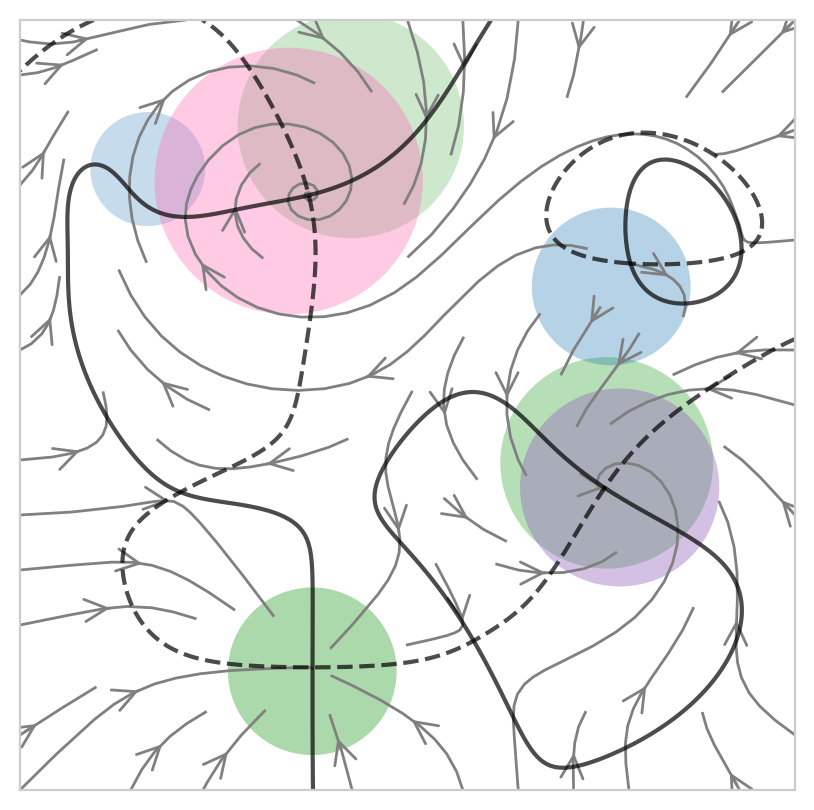

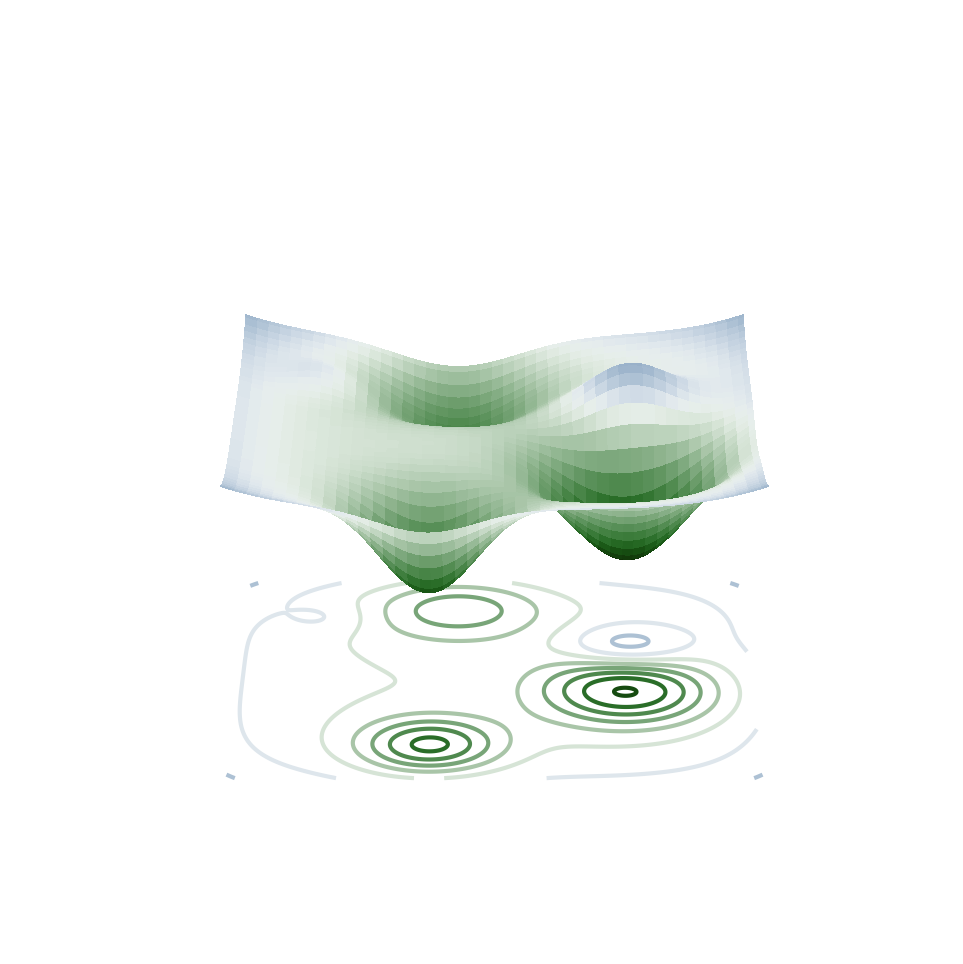

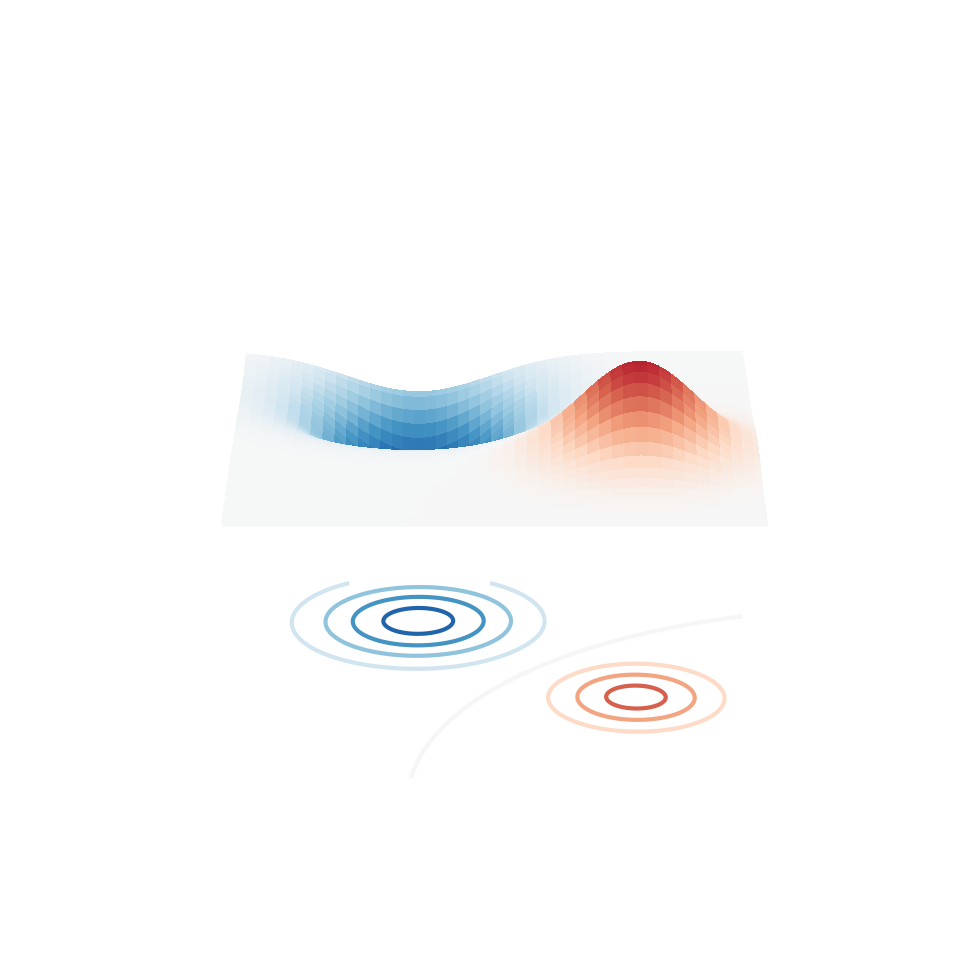

In [19]:
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='fp_types', cmap_center=0.2, )
ax = plt.gca()
ax.set_axis_off()
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='fp_types', cmap_center=0, rot=True, offset=3)
ax = plt.gca()
ax.set_axis_off()

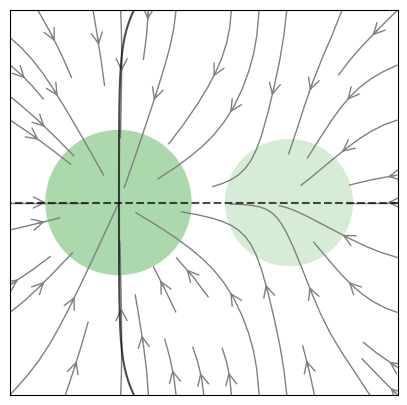

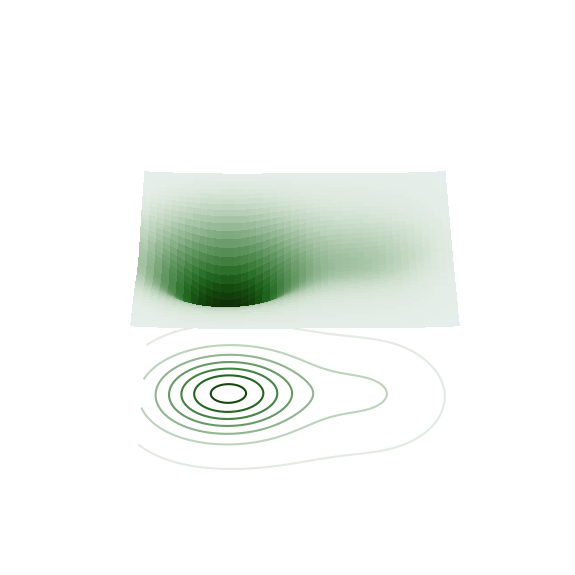

In [15]:
L = 2.5
npoints = 301
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

M1 = Node(x=-1.1, y=0, a=2.5, s=0.8)
M2 = Node(x=+1.1, y=0, a=0.6, s=0.7)   # 0.6 -> 1.2 -> 2.5 

landscape = Landscape([M1, M2], regime=mr.mr_const, A0=0.005)
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-90, color_scheme='fp_types', cmap_center=None, axes=False)
fig.tight_layout()


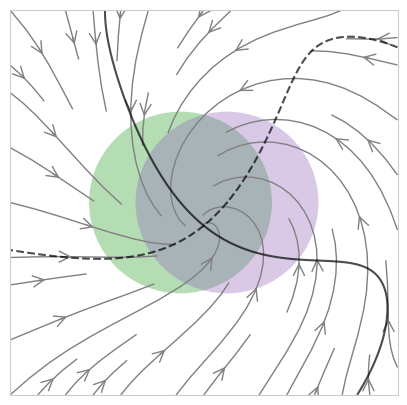

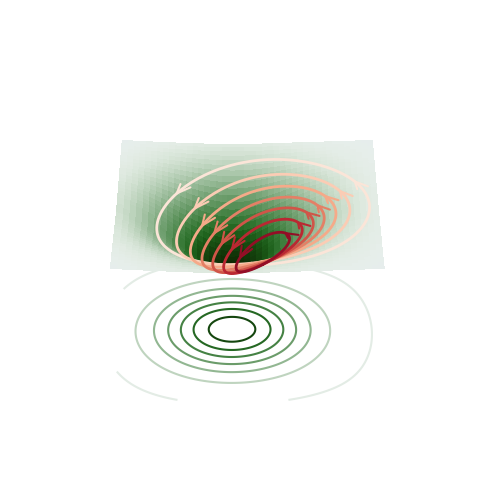

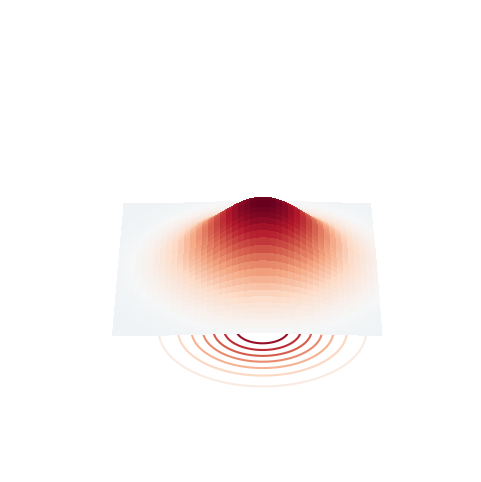

In [67]:
%autoreload
L = 2.5
npoints = 301
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

d = 0.3  # 0.3  -> 1.5
M1 = Node(x=-d, y=0, a=2., s=1)
M2 = Center(x=+d, y=0, a=2., s=1)

landscape = Landscape([M1, M2], regime=mr.mr_const, A0=0.005)
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-90, color_scheme='fp_types', cmap_center=None, axes=False, rot_contour=True)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-90, color_scheme='fp_types', cmap_center=None, axes=False, rot=True)



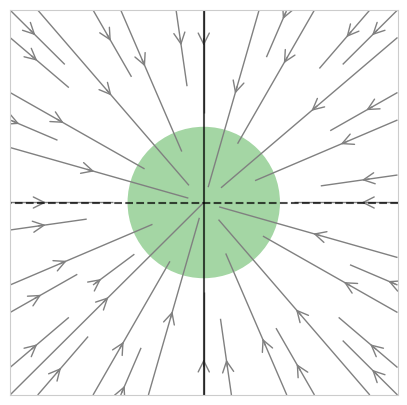

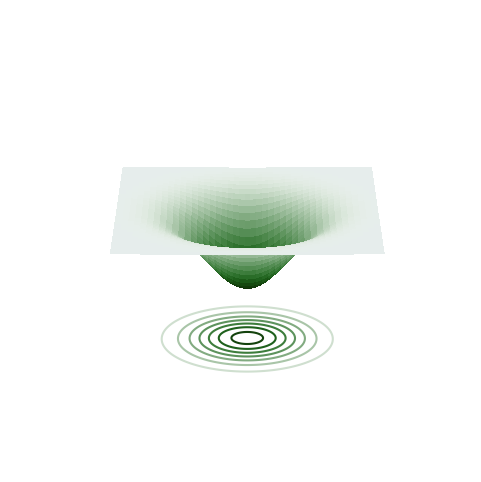

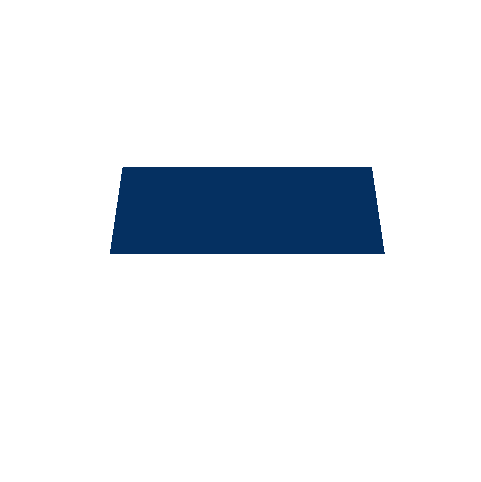

In [94]:
%autoreload
L = 3.
npoints = 301
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

M1 = Node(x=0, y=0, a=3., s=1)
M2 = UnstableNode(x=0, y=0, a=3., s=1)
M3 = Center(x=0, y=0, a=3., s=1)
M4 = NegCenter(x=0, y=0, a=3., s=1)
zlim=(-5,3)

landscape = Landscape([M1,], regime=mr.mr_const, A0=0.0)  # M1 -> M2 -> M3 -> M4 
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)
fig = visualize_potential(landscape, xx, yy, 0, elev=20, azim=-90, color_scheme='fp_types', cmap_center=0, axes=False, rot=True, zlim=zlim)



In [414]:
plt.rcParams.update({'figure.dpi': 200}) 
plt.rcParams.update({'font.size': 15})  
plt.rcParams['axes.grid'] = False

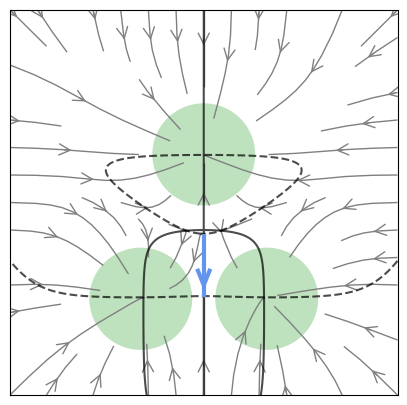

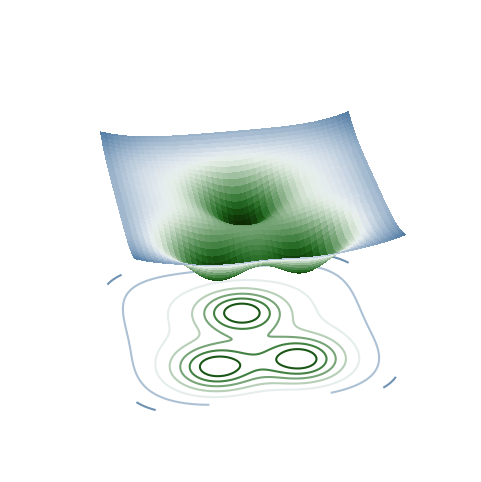

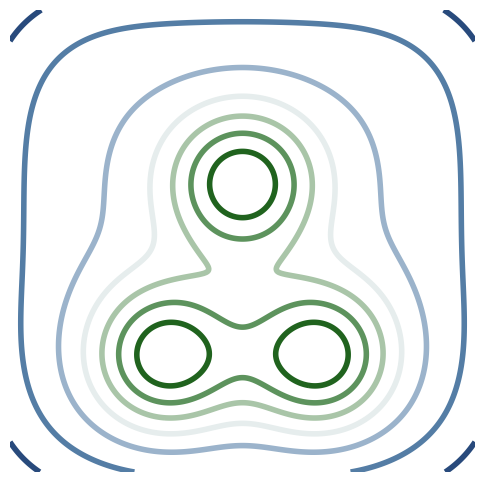

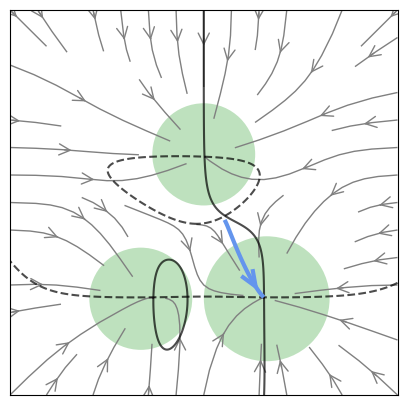

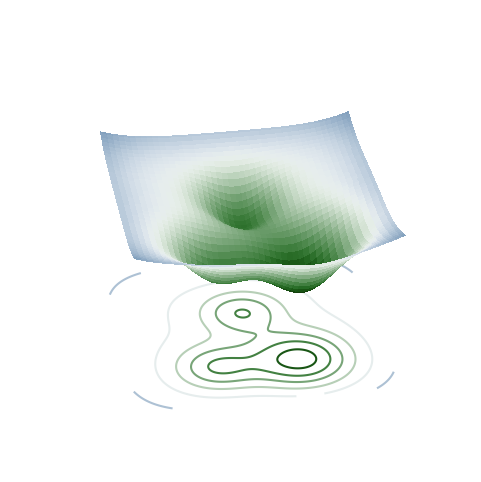

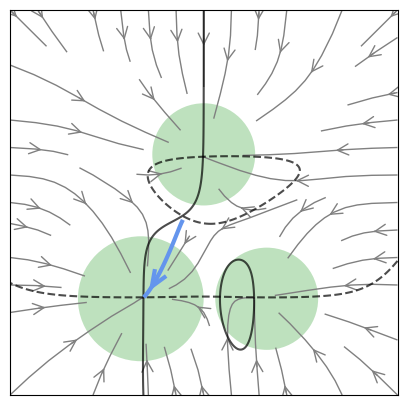

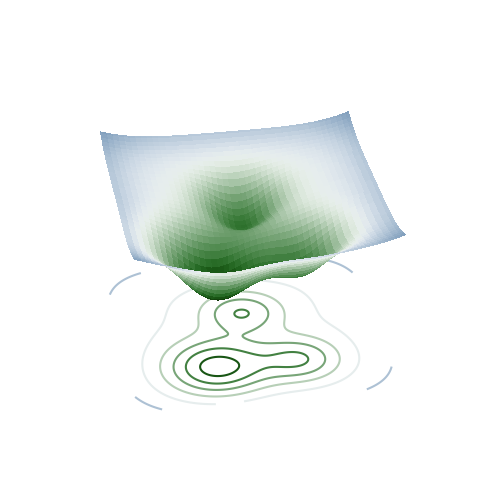

In [30]:
%autoreload
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

d = 1.3
l = 2
M1 = Node(x=-0., y=1., a=1.5, s=0.9)
M2 = Node(x=-d, y=-l, a=1.5, s=0.9)
M3 = Node(x=+d , y=-l, a=1.5, s=0.9)
zlim=(-4,2)
traj_color = 'cornflowerblue'

landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 6., 61), traj_init_cond=(0., -0.7), traj_color=traj_color)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)

fig1, ax1 = plt.subplots(1,1, figsize=(6,6))
derivs, pot, rot = landscape(0., (xx, yy), return_potentials=True)
ax1.contour(xx, yy, pot, zorder=0, cmap=cm.cork.reversed(), alpha=1., linewidths=4)
# ax1.streamplot(xx, yy, *derivs, density=0.2, arrowsize=2., arrowstyle='->', linewidth=3, color='grey', zorder=0, minlength=0.3)
ax1.axis('off')
plt.show()

M3 = Node(x=+d , y=-l, a=1.5, s=1.1)
landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 4., 45), traj_init_cond=(0.45, -0.4), traj_color=traj_color)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)


M2 = Node(x=-d, y=-l, a=1.5, s=1.1)
M3 = Node(x=+d , y=-l, a=1.5, s=0.9)
landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 4., 45), traj_init_cond=(-0.45, -0.4), traj_color=traj_color)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)

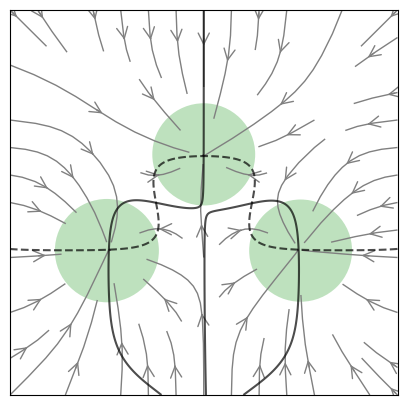

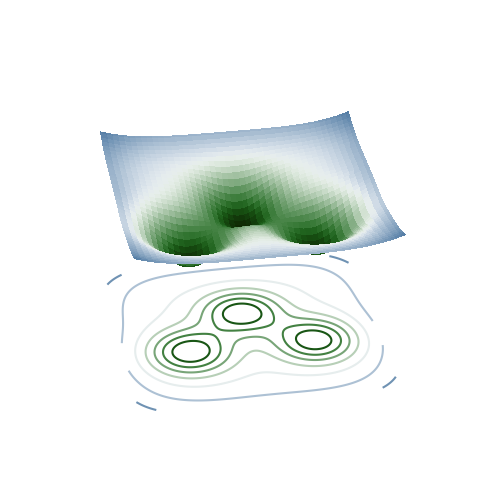

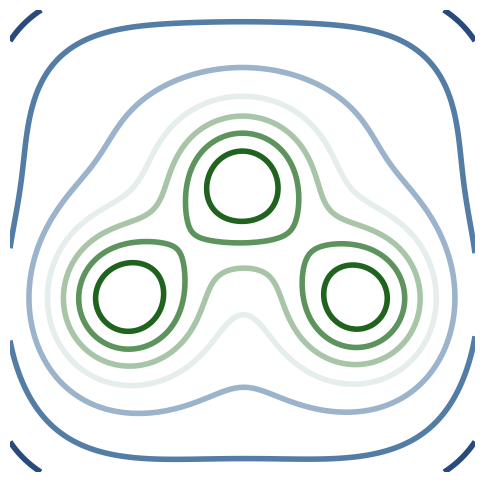

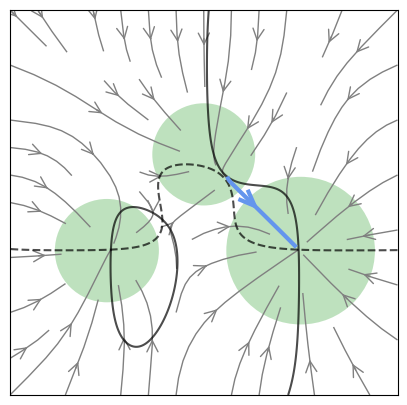

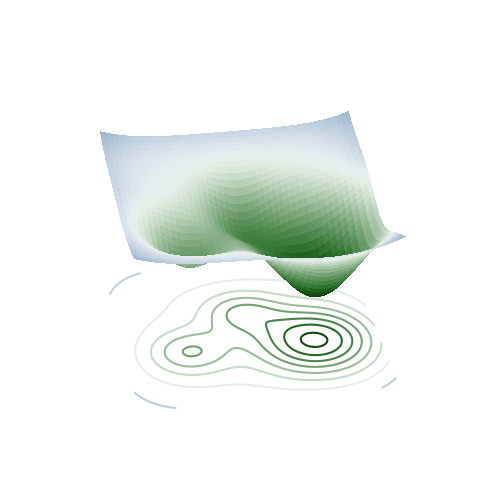

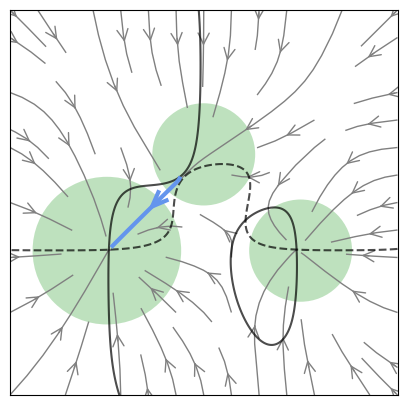

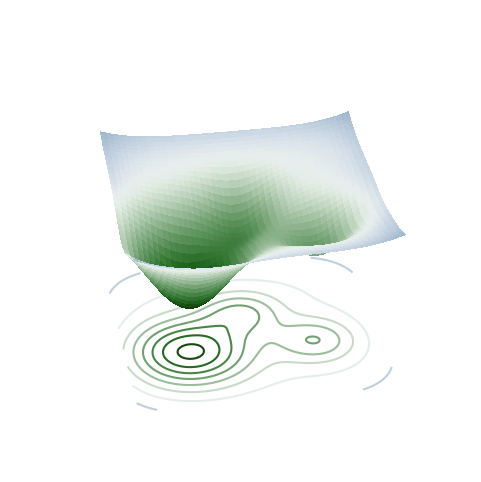

In [35]:
# %autoreload
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')

d = 2.
l = 1.
M1 = Node(x=-0., y=1., a=1.5, s=0.9)
M2 = Node(x=-d, y=-l, a=1.5, s=0.91)
M3 = Node(x=+d , y=-l, a=1.5, s=0.9)
zlim=(-4,2)
traj_color = 'cornflowerblue'

landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types',)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)


fig1, ax1 = plt.subplots(1,1, figsize=(6,6))
derivs, pot, rot = landscape(0., (xx, yy), return_potentials=True)
ax1.contour(xx, yy, pot, zorder=0, cmap=cm.cork.reversed(), alpha=1., linewidths=4, levels=8)
# ax1.streamplot(xx, yy, *derivs, density=0.2, arrowsize=2., arrowstyle='->', linewidth=3, color='grey', zorder=0, minlength=0.3)
ax1.axis('off')
plt.show()

M3 = Node(x=+d , y=-l, a=1.5, s=1.3)
landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 6.5, 65), traj_init_cond=(0.5, 0.5), traj_color=traj_color)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)


M2 = Node(x=-d, y=-l, a=1.5, s=1.3)
M3 = Node(x=+d , y=-l, a=1.5, s=0.9)
landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 6.5, 65), traj_init_cond=(-0.5, 0.5), traj_color=traj_color)
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='fp_types', cmap_center=0, axes=False, zlim=zlim)


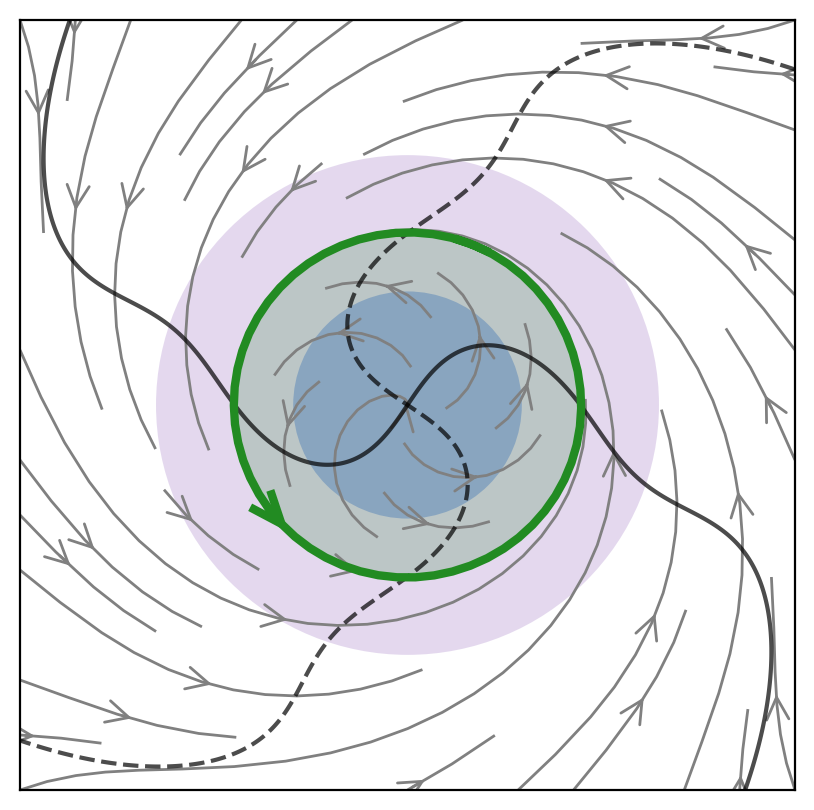

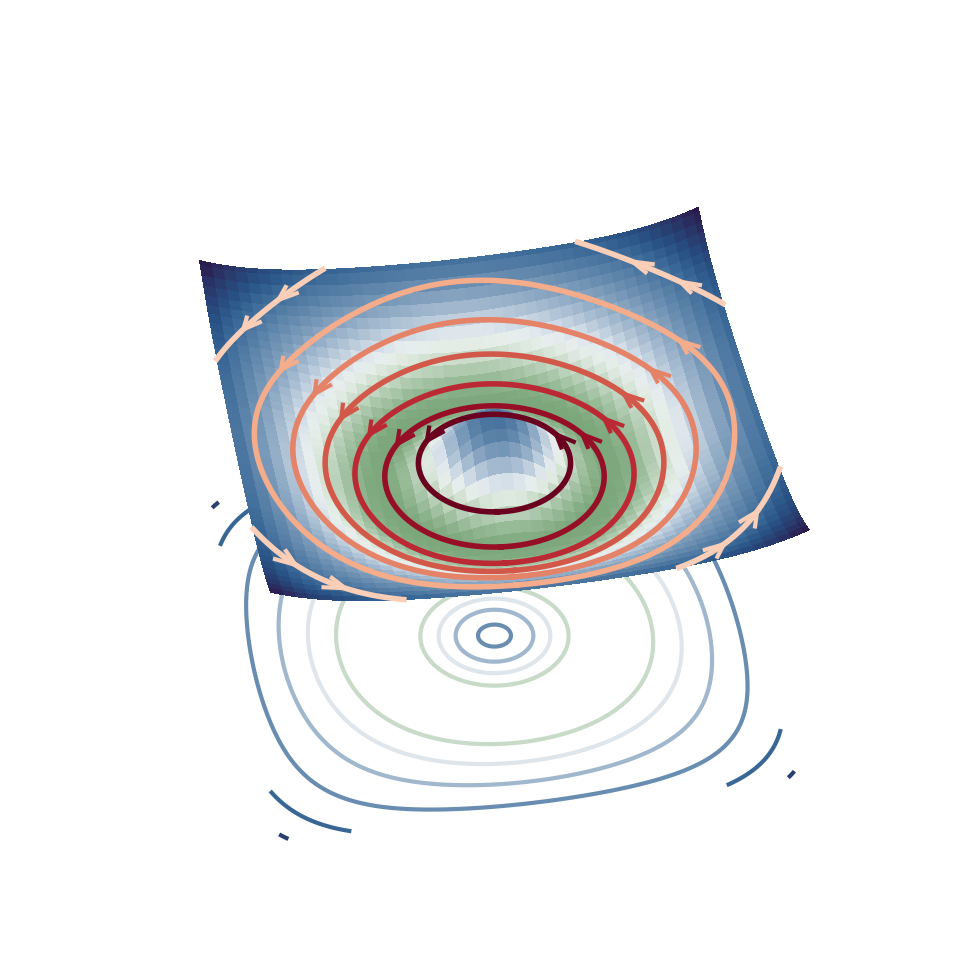

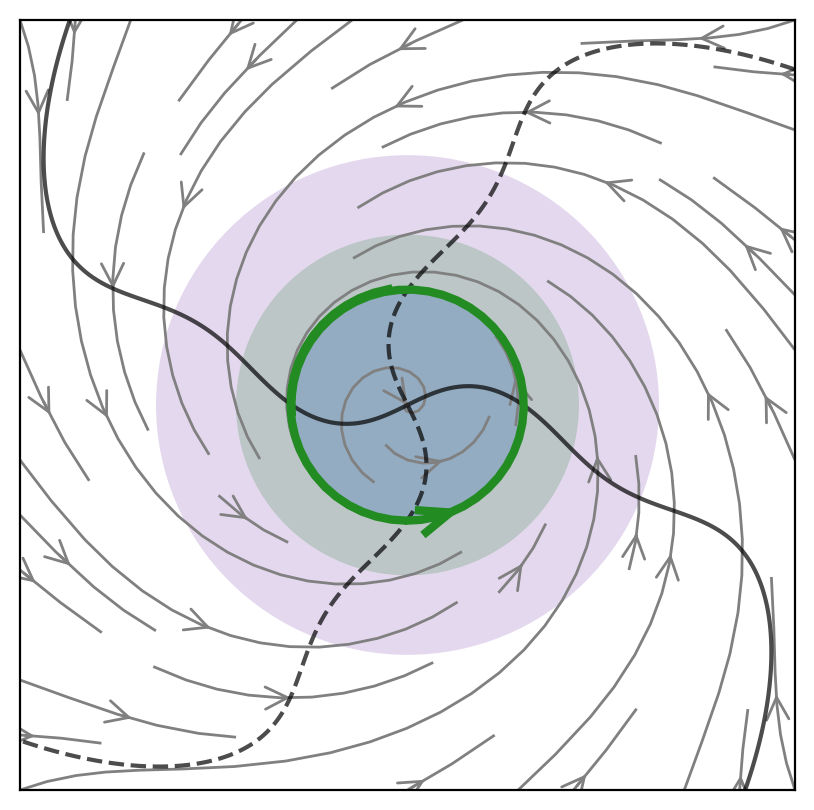

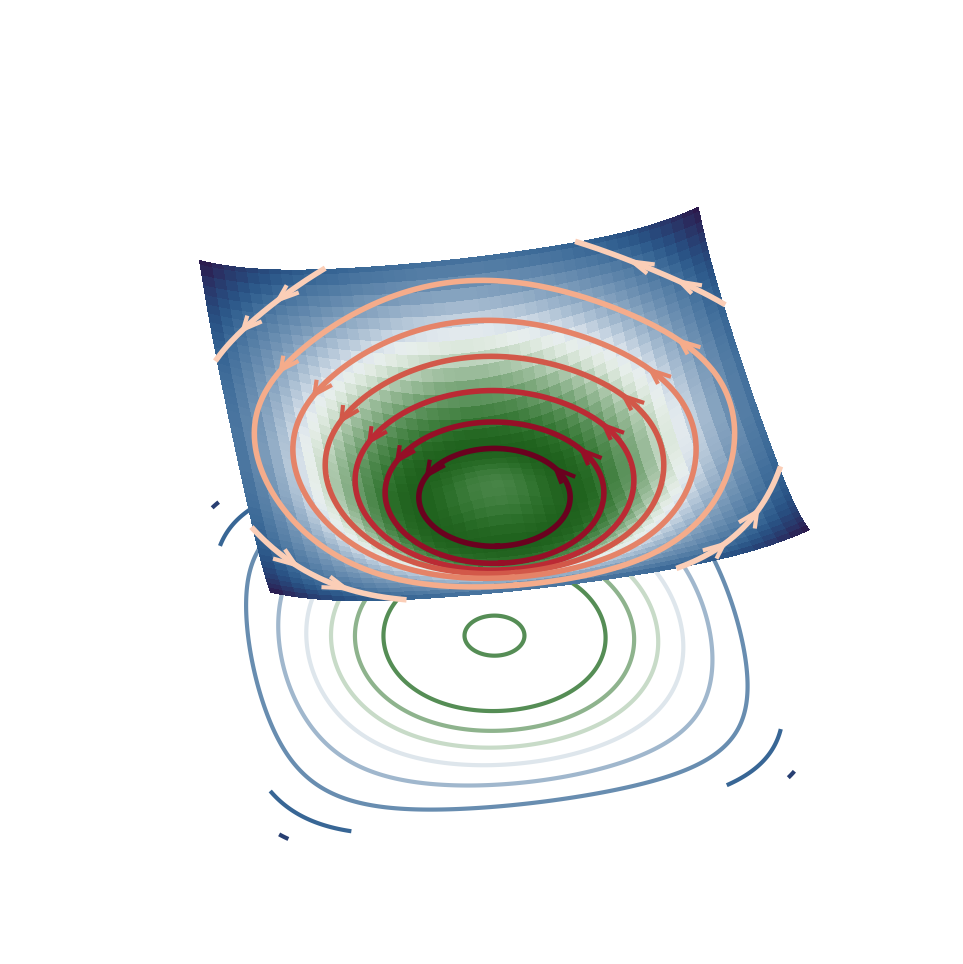

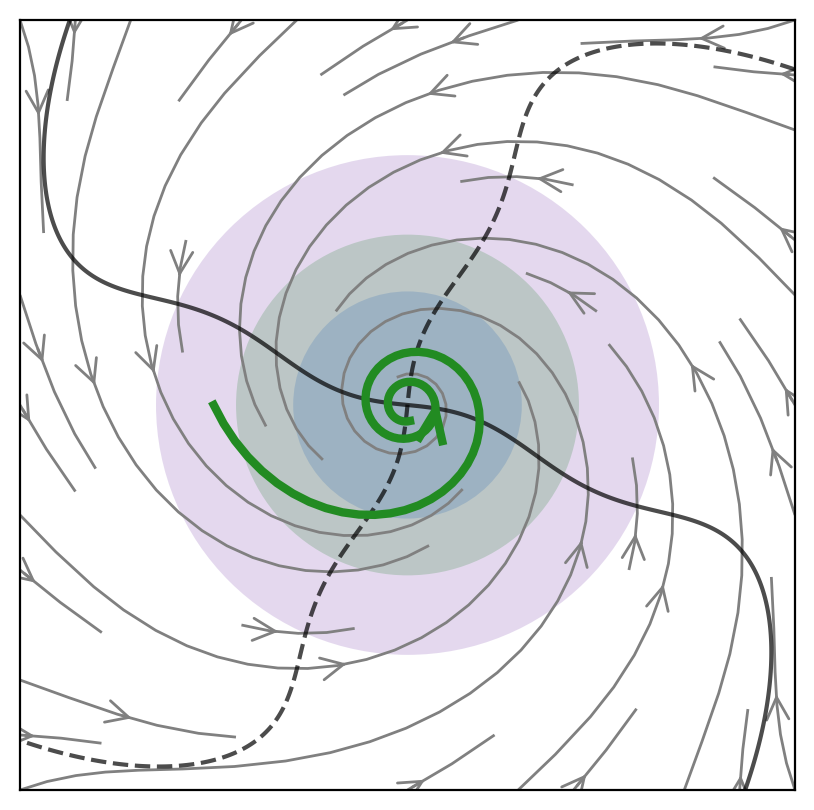

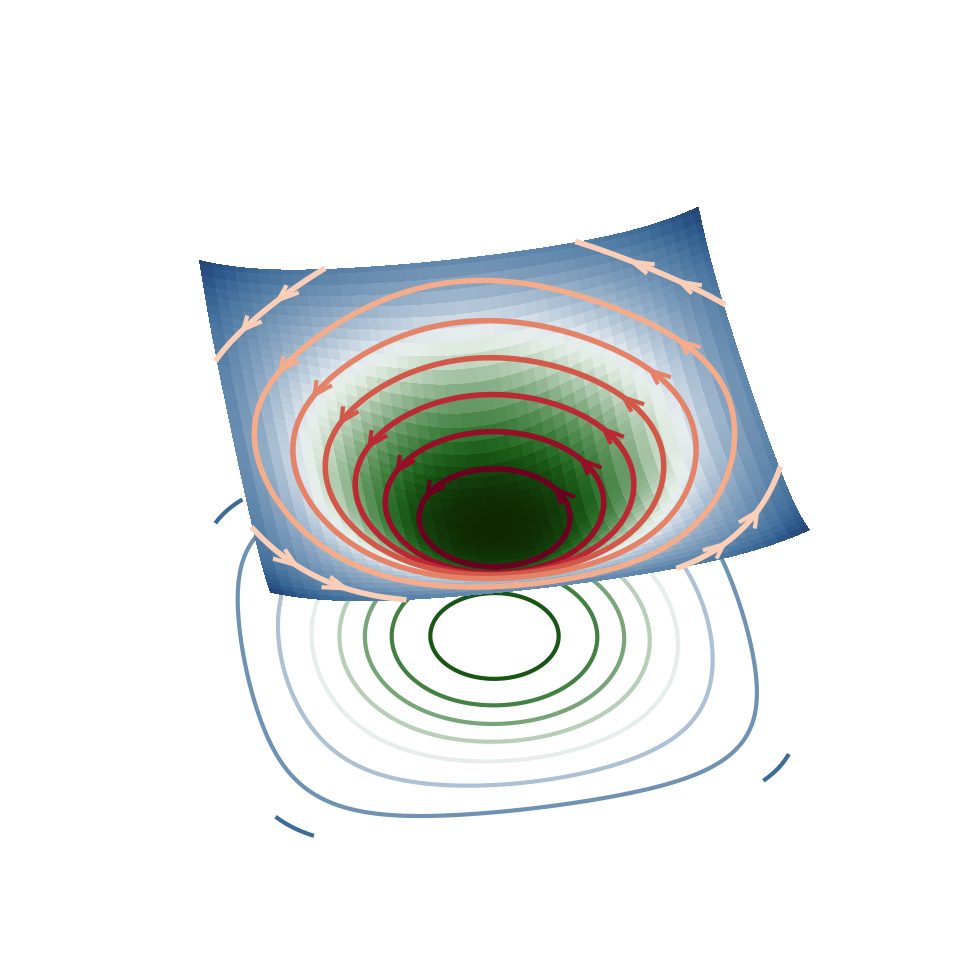

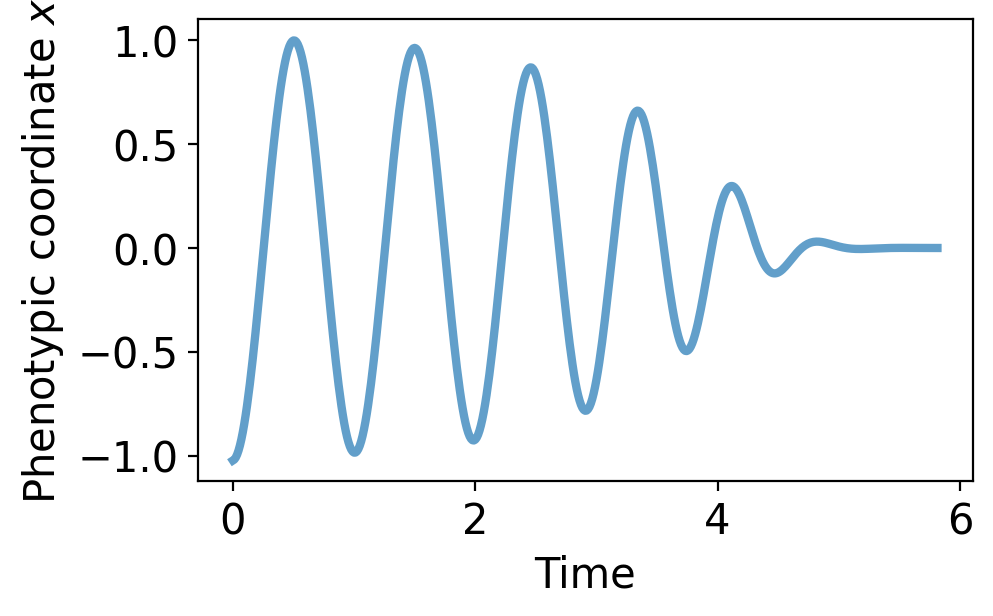

In [418]:
%autoreload
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
zlim=(-3,2)

M1 = Node(0., 0., 1., 1.5, tau=1.)
M3 = Center(0., 0., 1., 2.2, tau=1.)

for a in (2.5, 1.5, 0.9):
    M2 = UnstableNode(0., 0., a, 1., tau=1.)
    landscape = Landscape([M1, M2, M3], regime=mr.mr_const, A0=0.005)
    traj_start=40
    if a < 1:
        traj_start = 0
    fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 15, 101), traj_init_cond=(-2, 0.), traj_color='forestgreen', traj_start=traj_start)
    fig = visualize_potential(landscape, xx, yy, 0, elev=40, azim=-100, color_scheme='fp_types', cmap_center=-0.25, axes=False, zlim=zlim, rot_contour=True, min_contour_segment=120)
    
tau = 8.
M1 = Node(0., 0., 1.*np.ones(2), 1.5*np.ones(2), tau=tau)
M3 = Center(0., 0., 1.*np.ones(2), 2.2*np.ones(2), tau=tau)
M2 = UnstableNode(0., 0., (2.5, 0.), 1.*np.ones(2), tau=tau)
landscape = Landscape([M1, M2, M3], regime=mr.mr_sigmoid, A0=0.005)
landscape.init_cells(1, (-1.8, 0.))
tt = (-30, 20, 501)
traj, states = landscape.run_cells(*tt)
# plt.plot(traj[0, 0], traj[1, 0], lw=3)
plt.figure(figsize=(5,3))
x = traj[0,0]
T = np.argmin(np.abs(np.diff(x)[:120])) - np.argmin(np.abs(np.diff(x)[:30]))
plt.plot(np.linspace(0, 500, 501)/T, x/np.max(x), lw=3, alpha=0.7)
plt.ylabel(r'Phenotypic coordinate $x$')
plt.xlabel('Time')
plt.show()

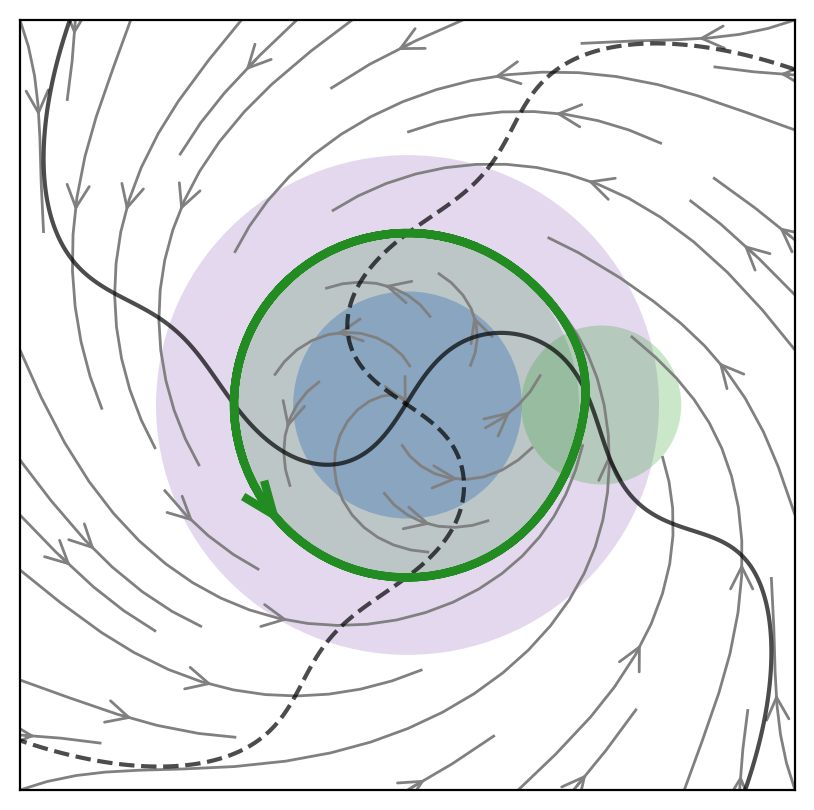

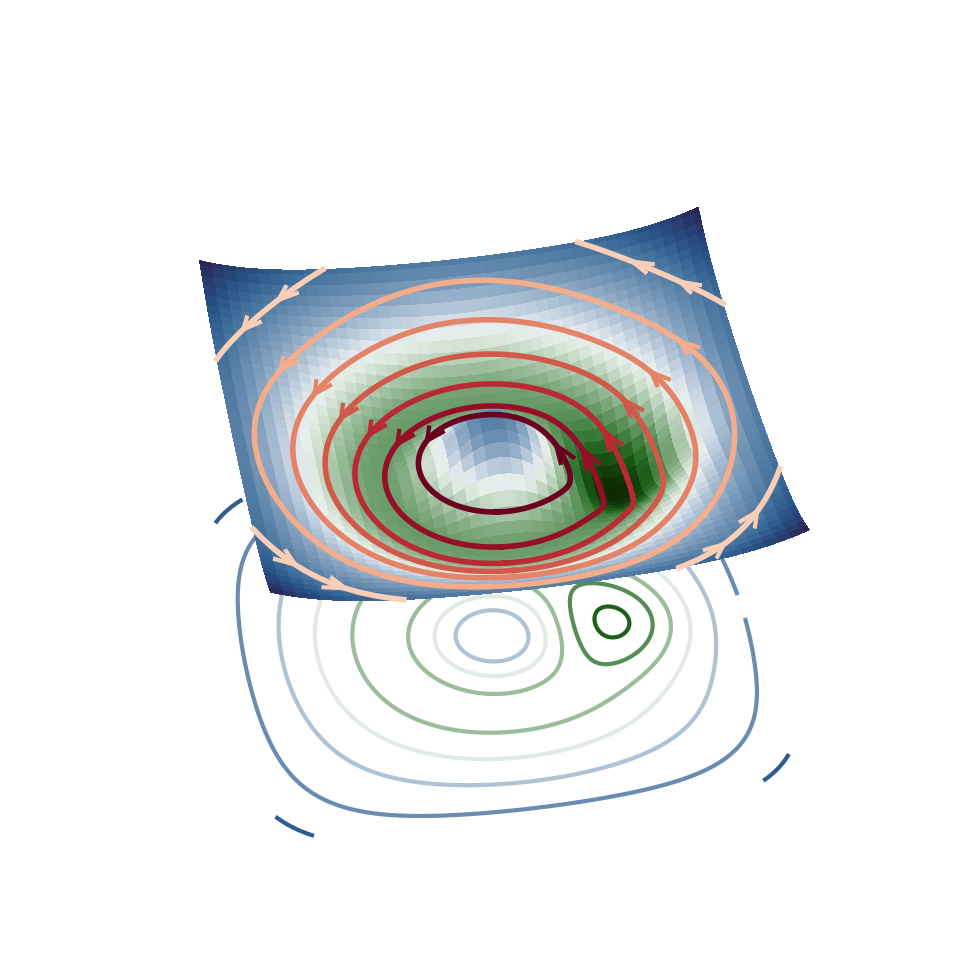

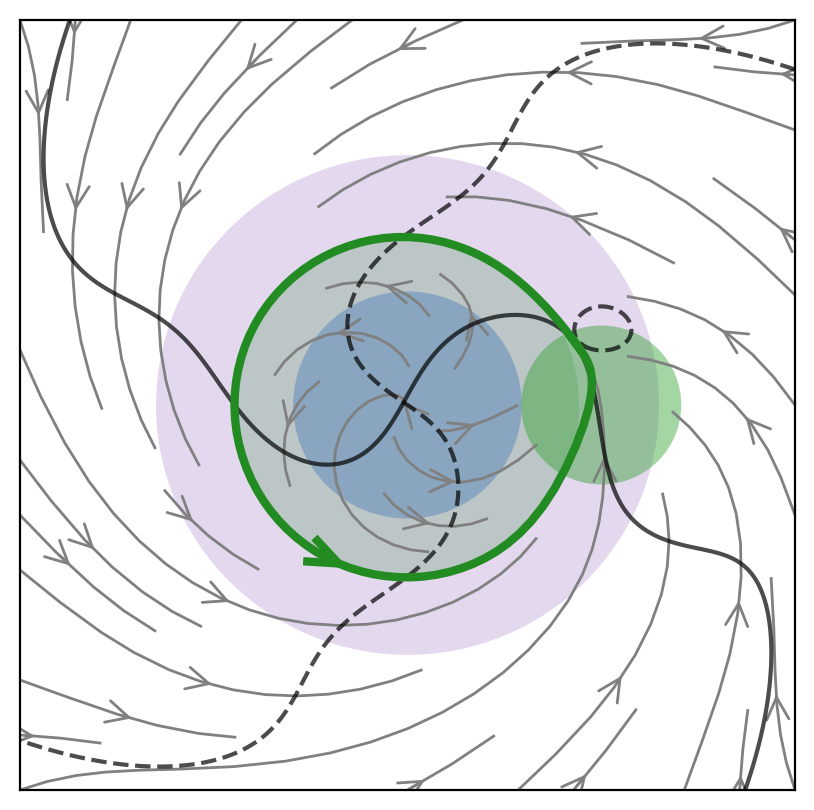

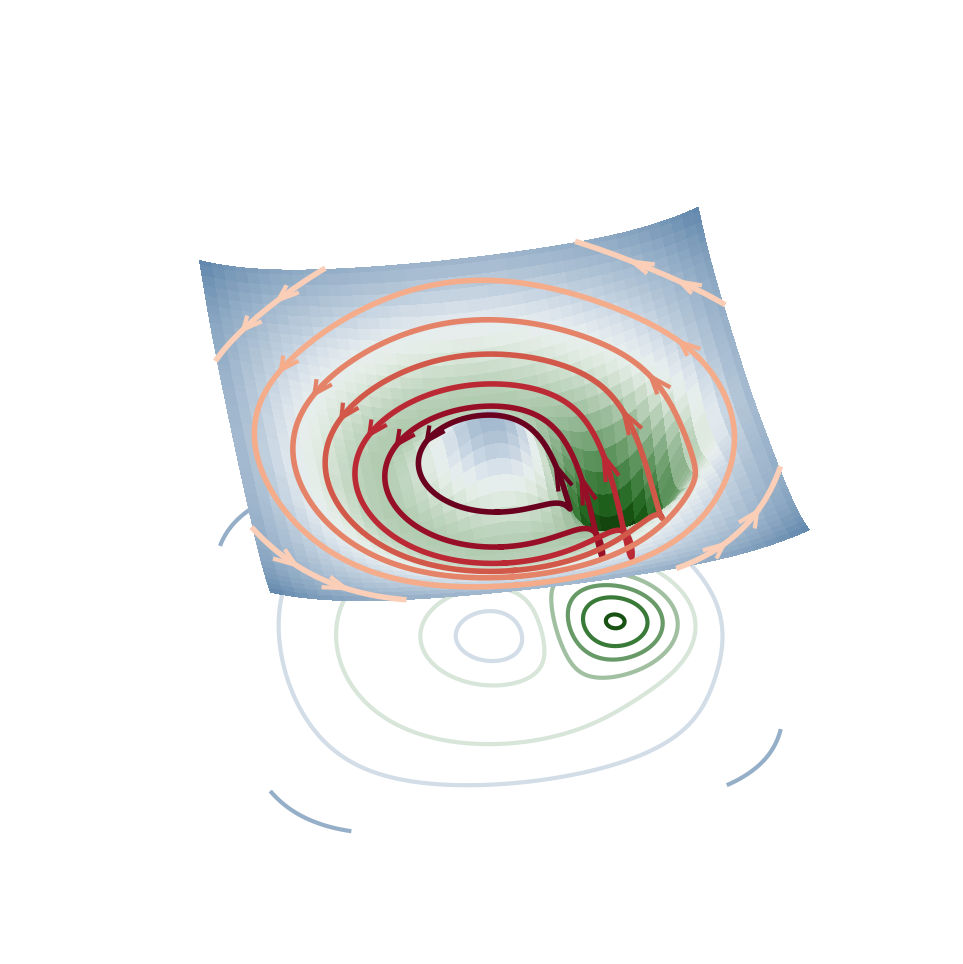

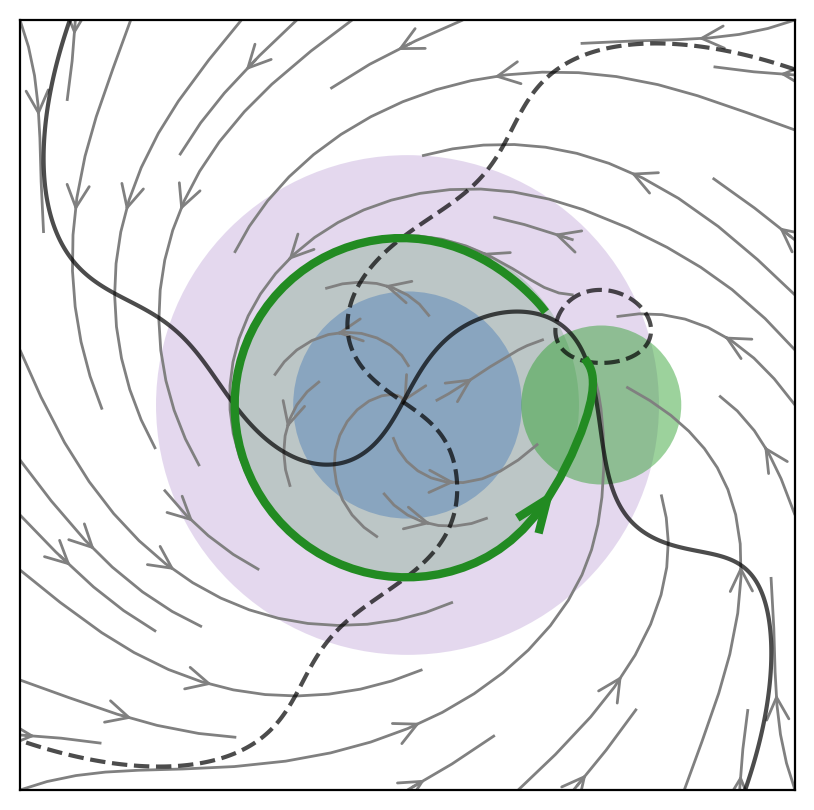

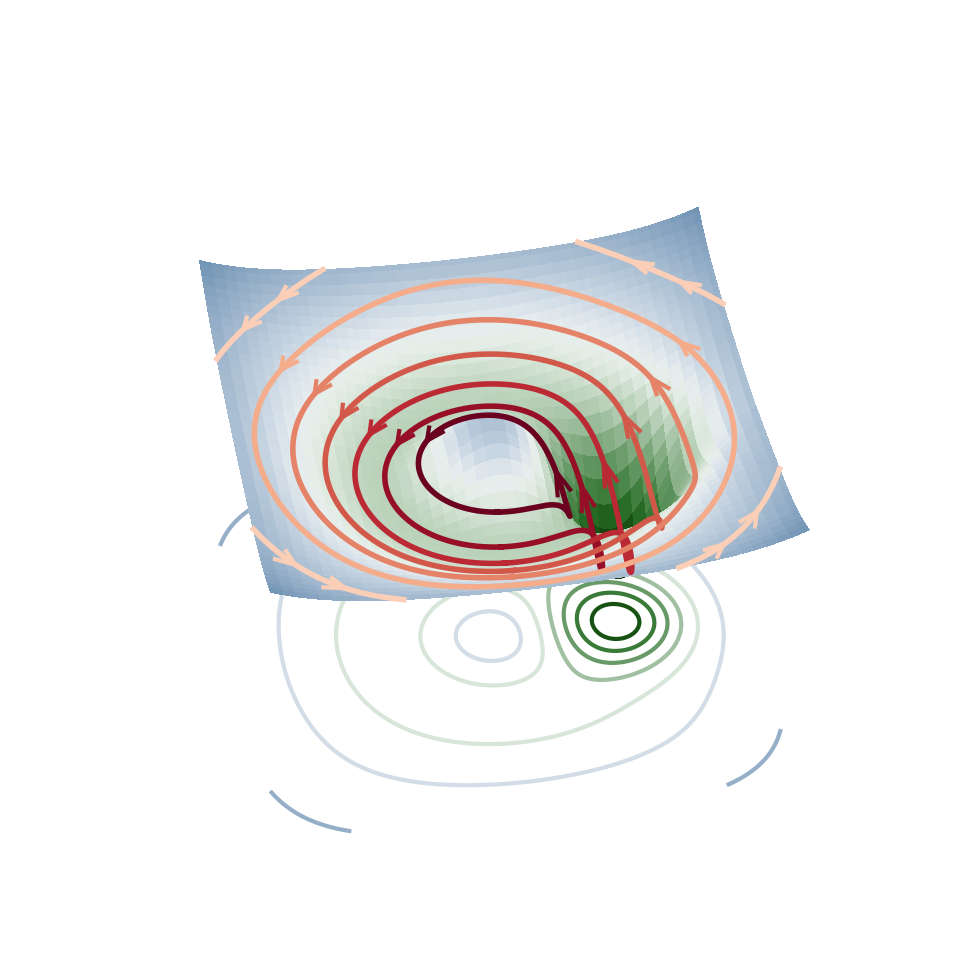

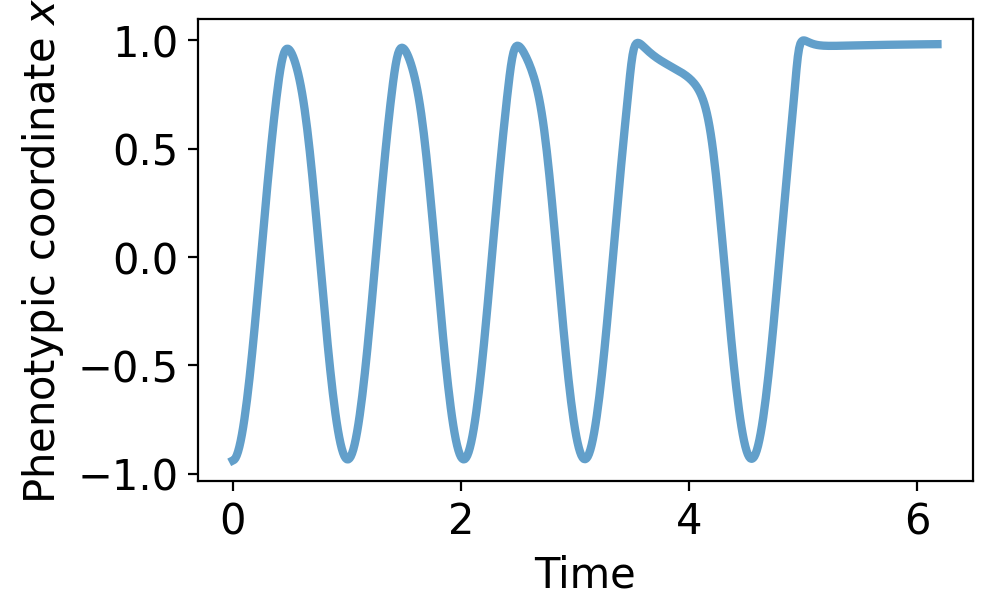

In [547]:
# %autoreload
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
zlim=(-3,2)

M1 = Node(0., 0., 1., 1.5, tau=1.)
M3 = Center(0., 0., 1., 2.2, tau=1.)
M2 = UnstableNode(0., 0., 2.5, 1., tau=1.)

for a in (1., 3., 3.5):
# for a in (4.,):
    M4 = Node(2., 0., a, 0.7)
    landscape = Landscape([M1, M2, M3, M4], regime=mr.mr_const, A0=0.005)
    traj_start=40
    init_cond=(0,-1.8)
    times = (0., 25., 251)
    if a > 3:
        traj_start = 0
        init_cond=(1.4, 1.)
        times = (0, 11, 111)
    fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=times, traj_init_cond=init_cond, traj_color='forestgreen', traj_start=traj_start)
    fig = visualize_potential(landscape, xx, yy, 0, elev=40, azim=-100, color_scheme='fp_types', cmap_center=-0.2, axes=False, zlim=zlim, rot_contour=True, min_contour_segment=120)
    
# fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 10, 151), traj_init_cond=(1.3, 1.1), traj_color='forestgreen', traj_start=traj_start)
# landscape.init_cells(1, (1.3, 1.2))
# tt = (0, 25, 251)
# traj, states = landscape.run_cells(*tt)
# plt.figure()
# plt.plot(traj[0, 0], traj[1, 0], lw=3)
# plt.show()
# plt.figure(figsize=(5,3))
# x = traj[0,0]
# # T = np.argmin(np.abs(np.diff(x)[80:150]))+80 #- np.argmin(np.abs(np.diff(x)[:10]))
# # plt.vlines(np.argmin(np.abs(np.diff(x)[80:150]))+80, -1, 1)
# plt.plot(np.linspace(0, 25, 251), x/np.max(x), lw=3, alpha=0.7)
# plt.ylabel(r'Phenotypic coordinate $x$')
# plt.xlabel('Time')
# plt.show()
    
tau = 8.
M1 = Node(0., 0., 1., 1.5, tau=tau)
M3 = Center(0., 0., 1., 2.2, tau=tau)
M2 = UnstableNode(0., 0., 2.5, 1., tau=tau)
M4 = Node(2., 0., (1., 4.), 0.7*np.ones(2), tau=tau)
# 
# 
landscape = Landscape([M1, M2, M3, M4], regime=mr.mr_sigmoid, A0=0.005)
landscape.init_cells(1, (-1.8, 0.))
tt = (-30, 25, 551)
traj, states = landscape.run_cells(*tt)
# plt.plot(traj[0, 0], traj[1, 0], lw=3)
plt.figure(figsize=(5,3))
x = traj[0,0]
T = np.argmin(np.abs(np.diff(x)[80:150]))+80 #- np.argmin(np.abs(np.diff(x)[:10]))
# plt.vlines(np.argmin(np.abs(np.diff(x)[80:150]))+80, -1, 1)
plt.plot(np.linspace(0, 550, 551)/T, x/np.max(x), lw=3, alpha=0.7)
plt.ylabel(r'Phenotypic coordinate $x$')
plt.xlabel('Time')
plt.show()




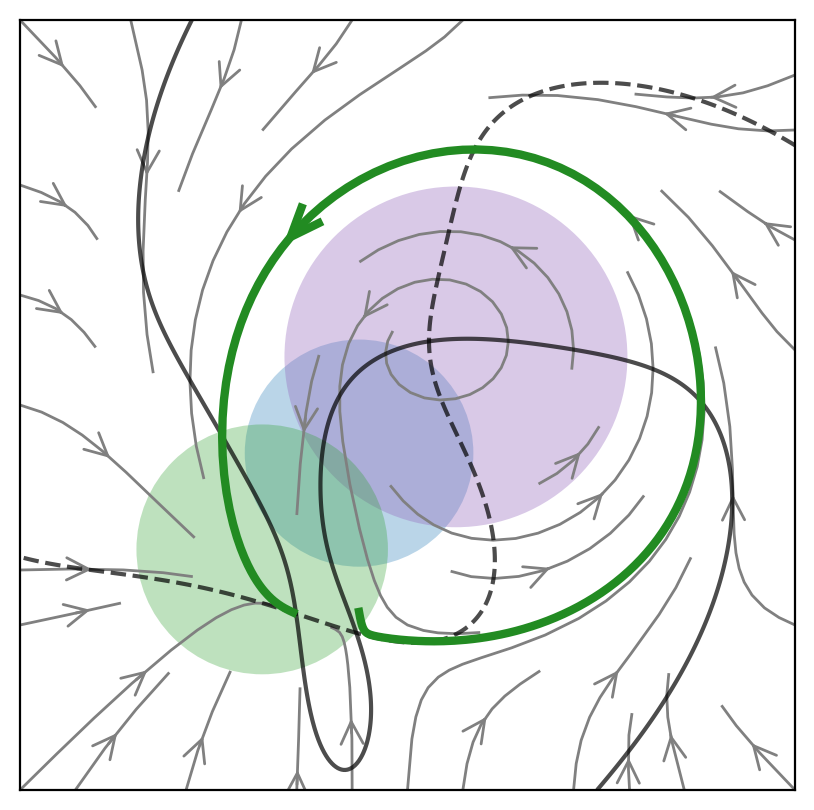

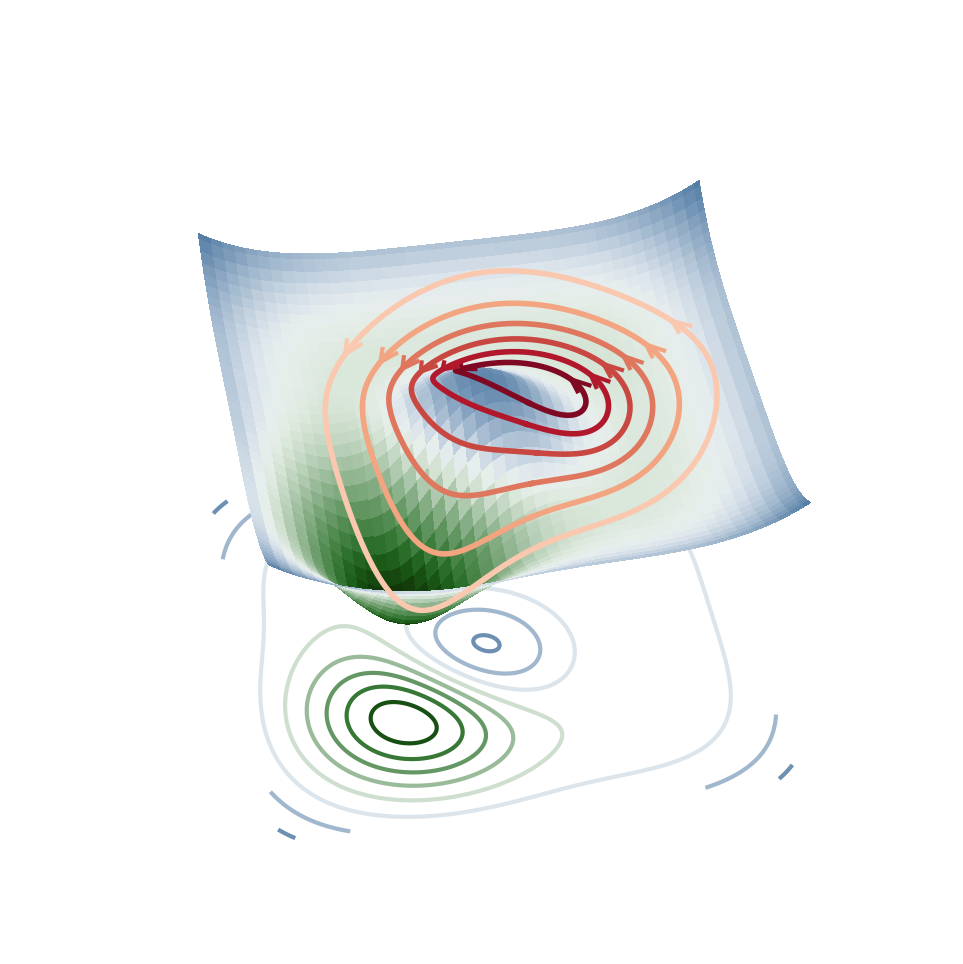

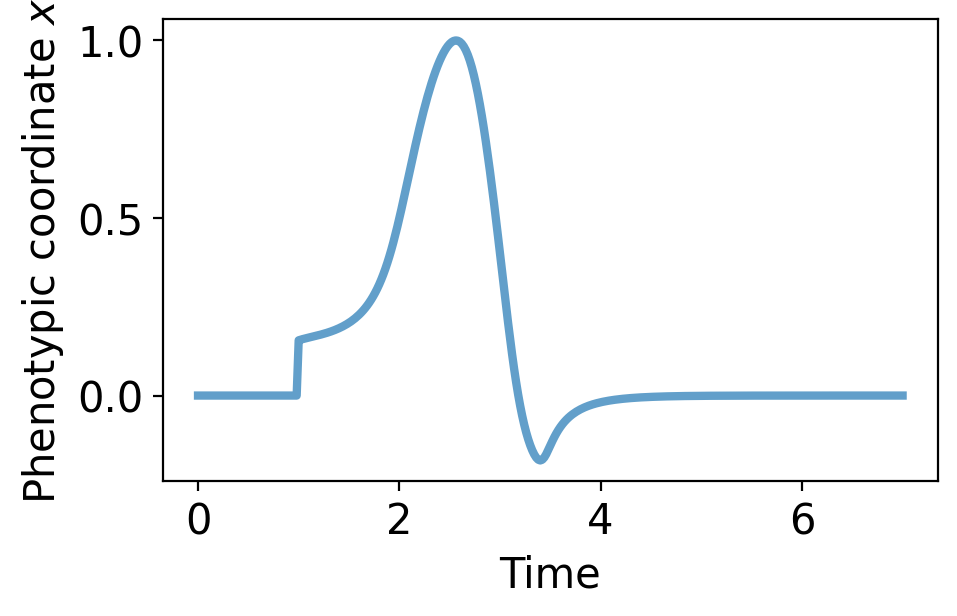

-2.1683194600827975


In [543]:
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
zlim=(-3,2)

# M1 = Node(0., 0., 1., 1.5, tau=1.)
M3 = Center(0.5, 0.5, 2., 1.5, tau=1.)
M2 = UnstableNode(-0.5, -0.5, 1.5, 1., tau=1.)
M4 = Node(-1.5, -1.5, 1.5, 1.1)

landscape = Landscape([M2, M3, M4], regime=mr.mr_const, A0=0.008)
traj_start=0
init_cond=(-0.5, -2.15)
fig, ax = visualize_landscape_t(landscape, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 22, 221), traj_init_cond=init_cond, traj_color='forestgreen', traj_start=traj_start)
fig = visualize_potential(landscape, xx, yy, 0, elev=40, azim=-100, color_scheme='fp_types', cmap_center=0.2, axes=False, zlim=zlim, rot_contour=True, min_contour_segment=250)


landscape.init_cells(1, init_cond)
tt = (0, 40, 301)
traj, states = landscape.run_cells(*tt)
# plt.figure()
# plt.plot(traj[0, 0], traj[1, 0], lw=3)
# plt.show()
plt.figure(figsize=(5,3))
x = np.zeros(351)
x[:50] = traj[0, 0, -1]
x[50:] = traj[0,0]

# T = np.argmin(np.abs(np.diff(x)[80:150]))+80 #- np.argmin(np.abs(np.diff(x)[:10]))
# plt.vlines(np.argmin(np.abs(np.diff(x)[80:150]))+80, -1, 1)
plt.plot(np.linspace(0, 35, 351)/5., ((x-x[-1])/np.max(x-x[-1]))[:], lw=3, alpha=0.7)
# plt.plot(np.linspace(0, 5, 50), ((x-x[-1])/np.max(x-x[-1]))[:50], lw=3, alpha=0.7, c='tab:blue')

plt.ylabel(r'Phenotypic coordinate $x$')
plt.xlabel('Time')
plt.show()

print(traj[1, 0, -1])



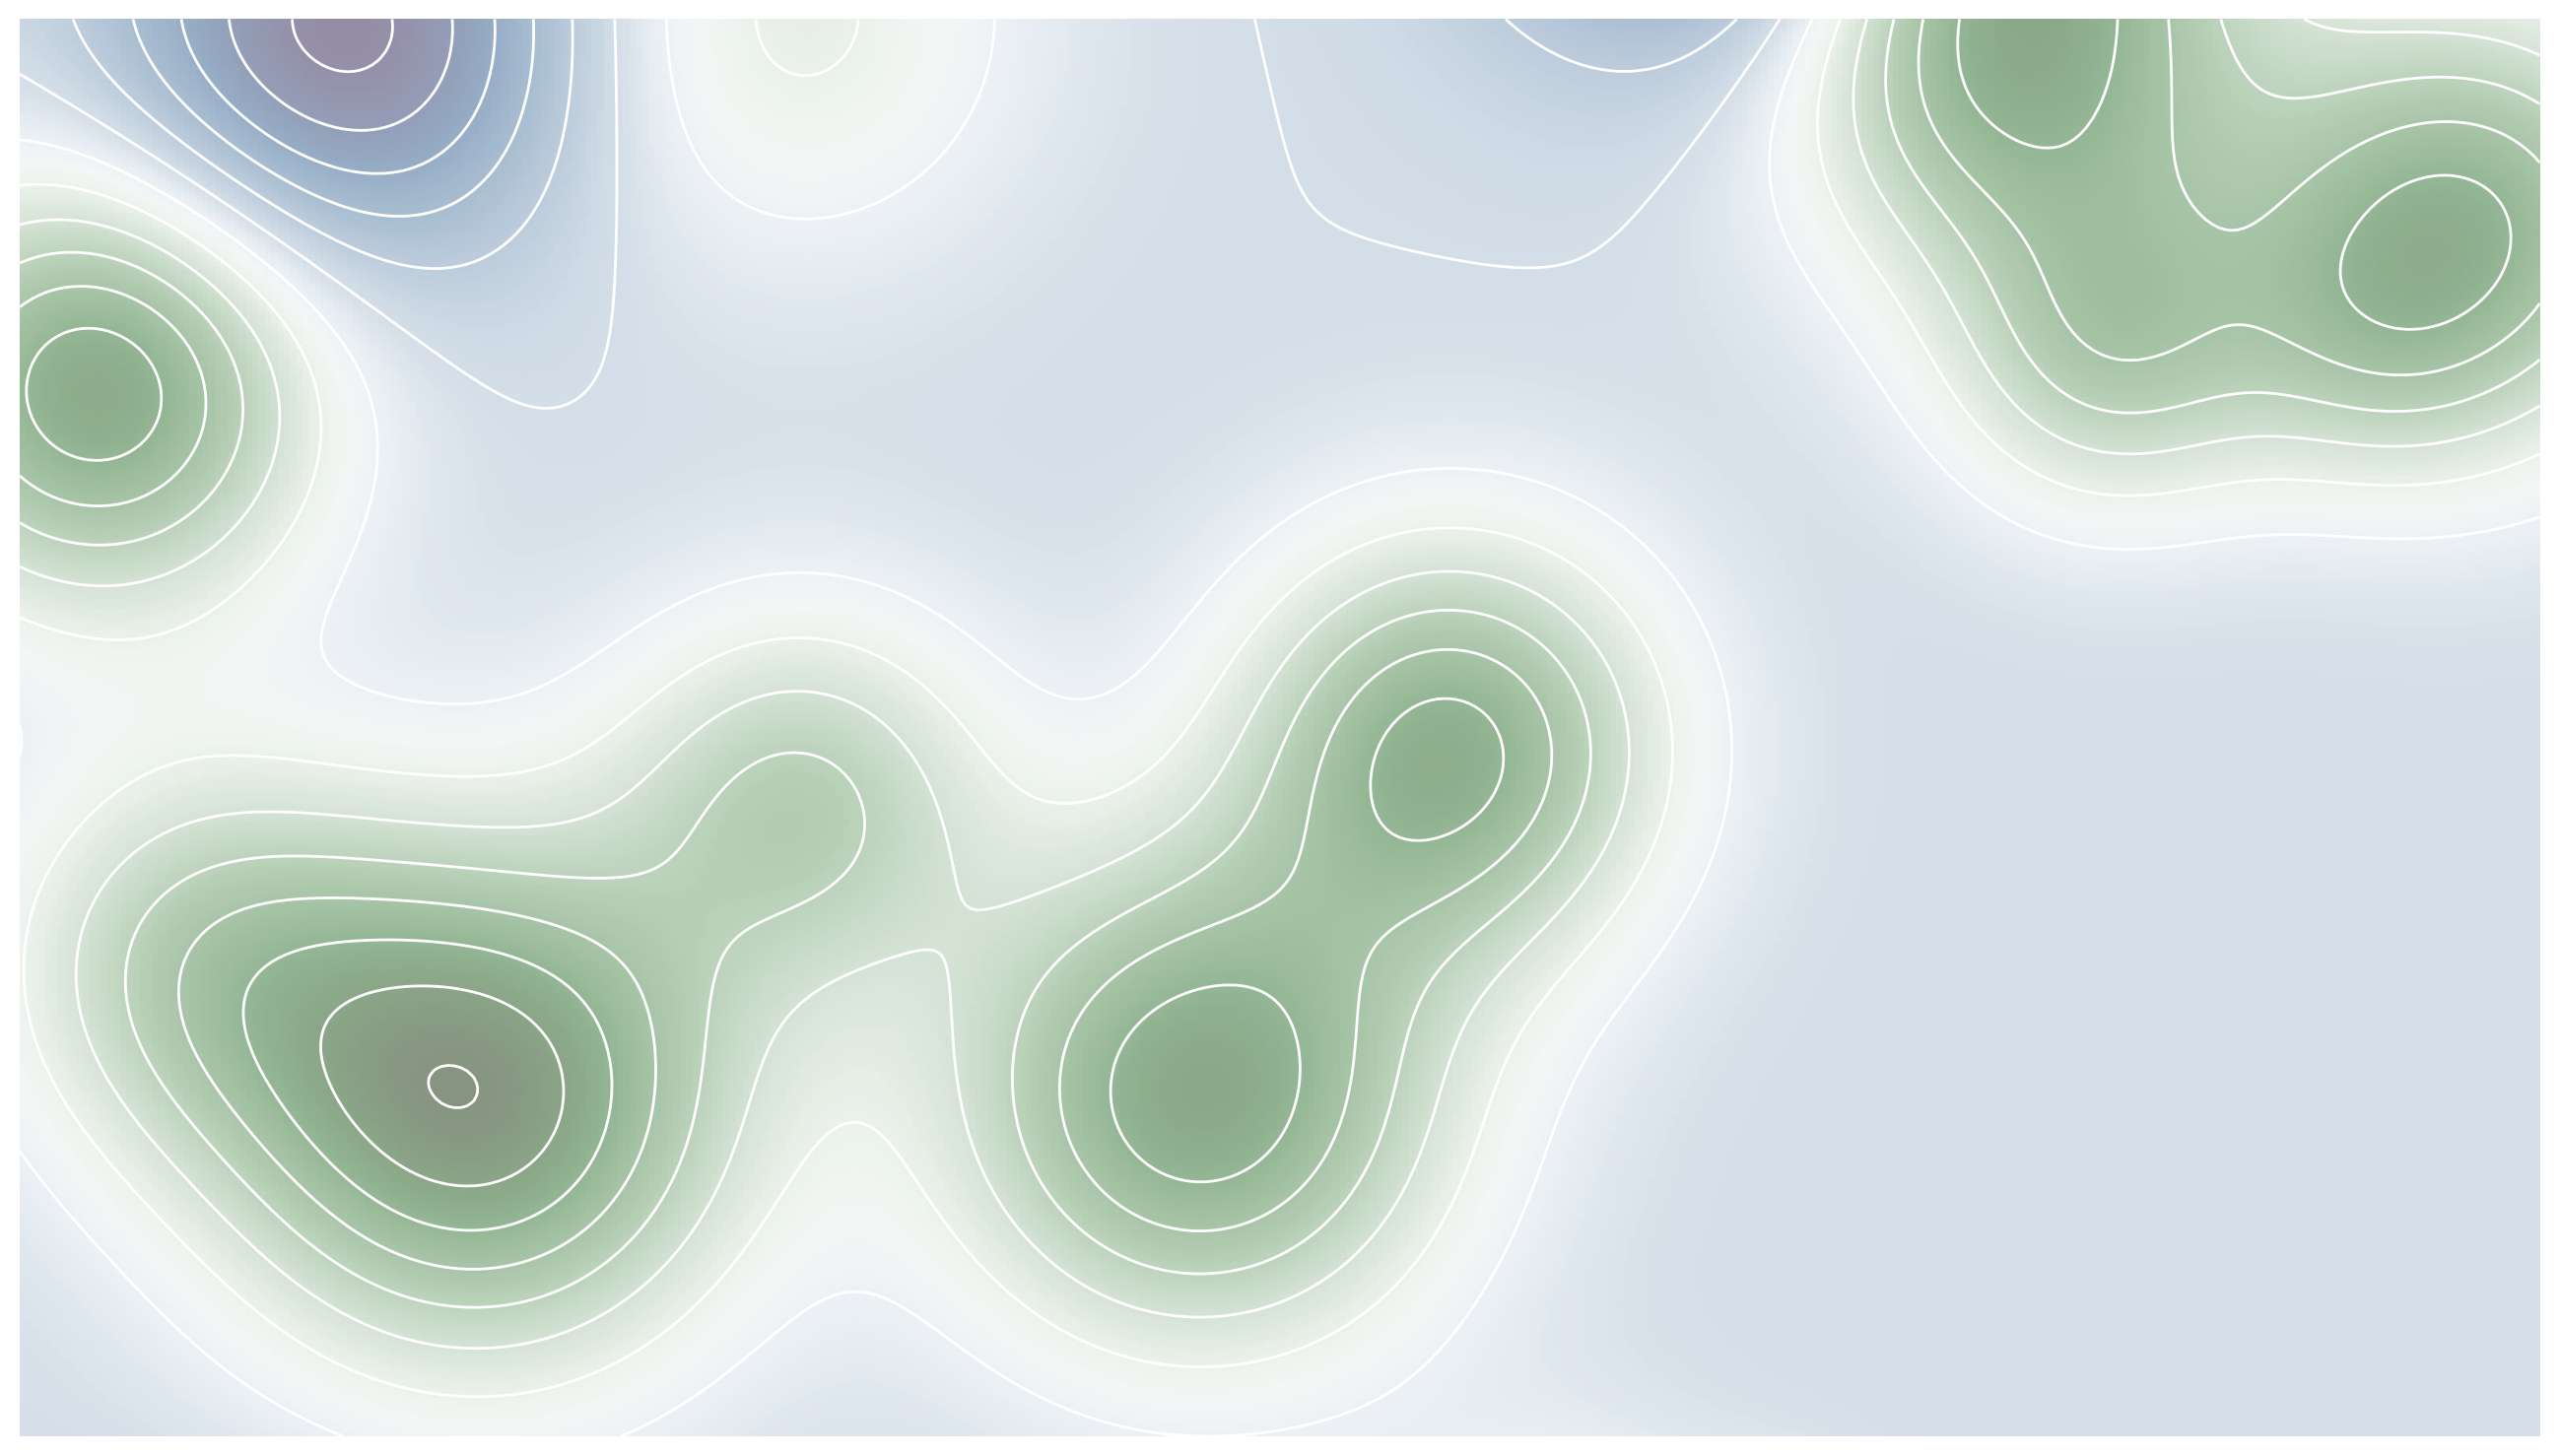

In [42]:
Lx = 8.
Ly = 4.5
npoints = 401
qx = np.linspace(-Lx, Lx, npoints)
qy = np.linspace(-Ly, Ly, npoints)

xx, yy = np.meshgrid(qx,qy, indexing = 'xy')

par_limits = {
    'x': (-8.,8.),
    'y': (-8., 8.),
    'a': (0.5,3.),
    's': (0.5, 1.2),
}

par_choice_values = {}

used_fp_types = (Node,UnstableNode, Center, NegCenter)

start_module_list_1 = [Node.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=2) for i in range(20)]
start_module_list_2 = [UnstableNode.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=2) for i in range(5)]
# start_module_list_3 = [Center.generate(
#     par_limits,par_choice_values, immutable_pars_list=[], n_regimes=2) for i in range(1)]
# start_module_list_4 = [NegCenter.generate(
#     par_limits,par_choice_values, immutable_pars_list=[], n_regimes=2) for i in range(1)]

start_module_list = start_module_list_1 + start_module_list_2  #+ start_module_list_3 + start_module_list_4

landscape = Landscape(start_module_list, regime=mr.mr_piecewise, morphogen_times=(1.,), A0=0.0)


fig1, ax1 = plt.subplots(1,1, figsize=(16.5,9.5))
derivs, pot, rot = landscape(0., (xx, yy), return_potentials=True)
ax1.imshow(pot, extent=(-Lx,Lx,-Ly,Ly), origin='lower', cmap=cm.cork.reversed(), alpha=0.5, )
ax1.contour(xx, yy, pot, zorder=0, colors='w', alpha=1., linewidths=1, levels=15, linestyles='-')
ax1.axis('off')
plt.show()

In [52]:
Lx = 48/6
Ly = 36/6
npoints = 401
qx = np.linspace(-Lx, Lx, npoints)
qy = np.linspace(-Ly, Ly, npoints)

xx, yy = np.meshgrid(qx,qy, indexing = 'xy')

par_limits = {
    'x': (-Lx,Lx),
    'y': (-Ly, Ly),
    'a': (0.5,3.),
    's': (0.5, 1.2),
}

par_choice_values = {}

used_fp_types = (Node,UnstableNode, Center, NegCenter)

start_module_list_1 = [Node.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=2) for i in range(100)]
start_module_list_2 = [UnstableNode.generate(
    par_limits,par_choice_values, immutable_pars_list=[], n_regimes=2) for i in range(50)]
# start_module_list_3 = [Center.generate(
#     par_limits,par_choice_values, immutable_pars_list=[], n_regimes=2) for i in range(1)]
# start_module_list_4 = [NegCenter.generate(
#     par_limits,par_choice_values, immutable_pars_list=[], n_regimes=2) for i in range(1)]

start_module_list = start_module_list_1 + start_module_list_2  #+ start_module_list_3 + start_module_list_4

landscape = Landscape(start_module_list, regime=mr.mr_piecewise, morphogen_times=(1.,), A0=0.0)


fig1, ax1 = plt.subplots(1,1, figsize=(48,36))
plt.margins(0, 0)
derivs, pot, rot = landscape(0., (xx, yy), return_potentials=True)
ax1.imshow(pot, extent=(-Lx,Lx,-Ly,Ly), origin='lower', cmap=cm.cork.reversed(), alpha=0.5, )
ax1.contour(xx, yy, pot, zorder=0, colors='w', alpha=1., linewidths=1, levels=15, linestyles='-')
ax1.axis('off')
fig1.savefig('../poster_background_3.png', dpi=200,bbox_inches='tight')
plt.close(fig1)

Landscape with modules:
Node: x=0.8385304318911464; y=-1.1299849538525235; a=[3.93358927,3.09420094,1.36475347]; s=[0.72509370,0.78730297,0.73301621],
Node: x=1.8387442238438636; y=0.9880032881552641; a=[2.60076890,4.37139181,3.67557626]; s=[0.58637676,0.93046559,0.65125563],
Node: x=0.051168132051579995; y=2.358169804225456; a=[1.72464606,2.88712774,4.64077433]; s=[1.05618208,1.08820109,0.80821386],
Node: x=-2.0144549593979306; y=-2.230697228430505; a=[1.00254430,1.62119219,3.14968548]; s=[0.90654901,0.51460169,0.82591260]


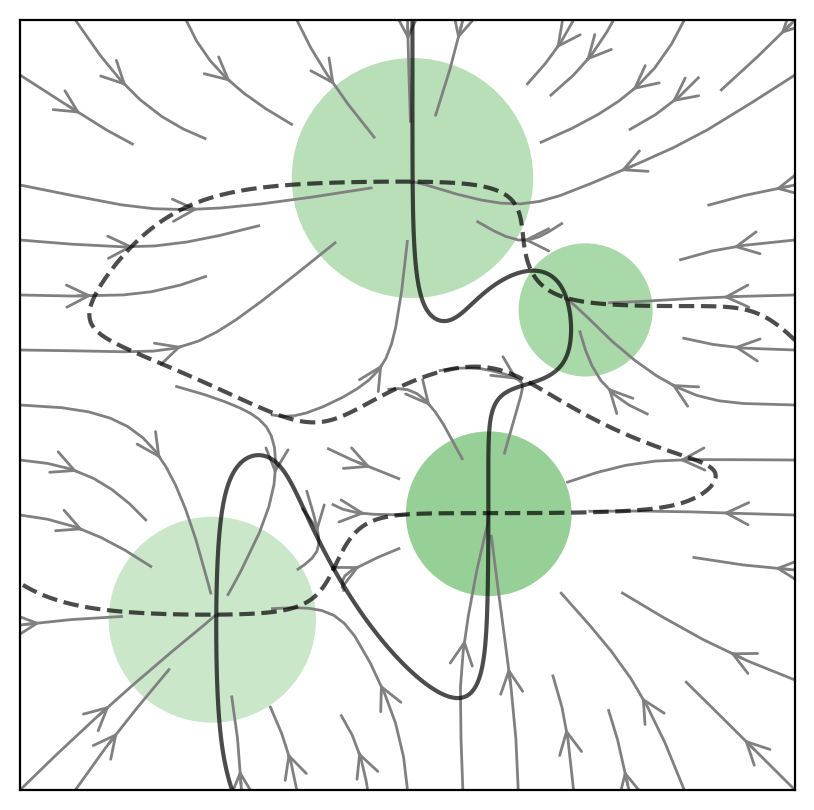

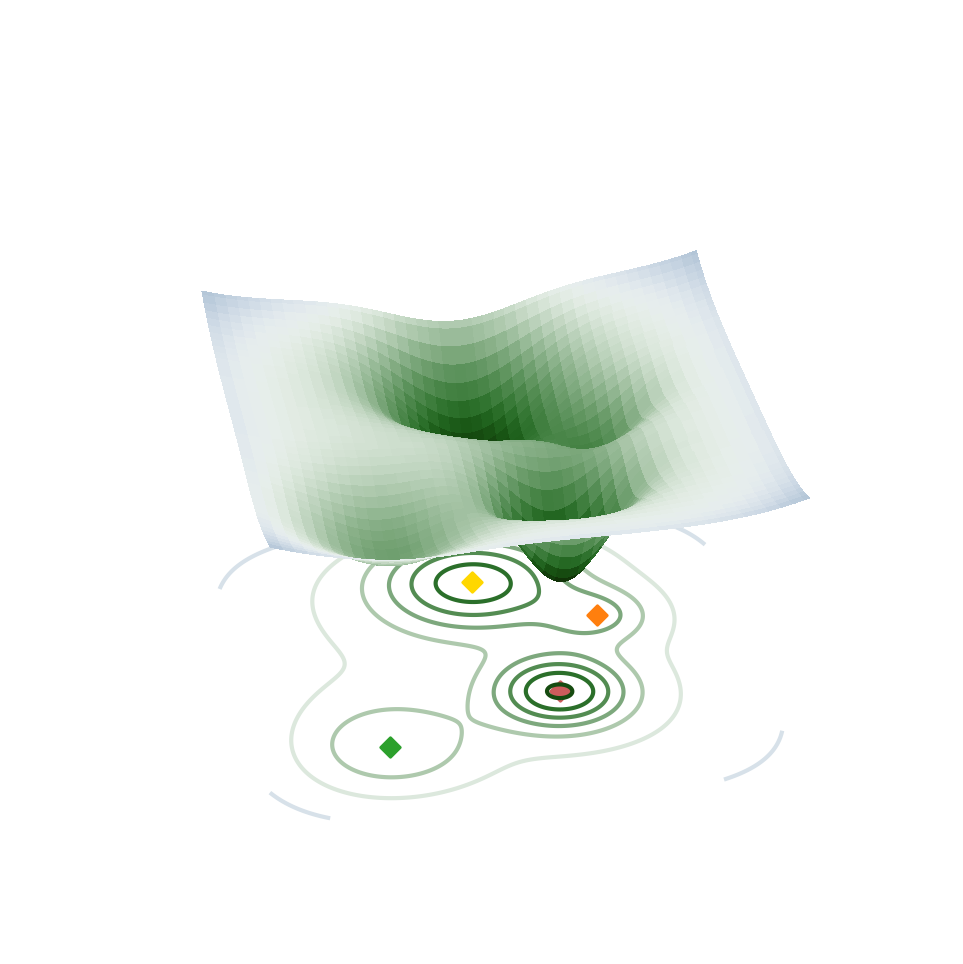

In [144]:
L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

par_limits = {
    'x': (-3., 3.),
    'y': (-3., 3.),
    'a': (0.5, 5.),
    's': (0.5, 1.1),
}

par_choice_values = {}

start_module_list_1 = [Node.generate(
    par_limits, par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(4)]
start_module_list_2 = [UnstableNode.generate(
    par_limits, par_choice_values, immutable_pars_list=[], n_regimes=3) for i in range(2)]


start_module_list = start_module_list_1 #+ start_module_list_2 

landscape = Landscape(start_module_list, regime=mr.mr_piecewise, morphogen_times=(2., 7.), A0=0.005)

print(landscape)
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')
fig = visualize_potential(landscape, xx, yy, 0, elev=30, azim=-100, color_scheme='order', cmap_center=0.2, scatter=True,)
ax = plt.gca()
ax.set_axis_off()


In [237]:
L = 2.5
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

par_limits = {
    'x': (-2., 2.),
    'y': (-2., 2.),
    'a': (0.5, 5.),
    's': (0.5, 1.),
}

par_choice_values = {}

start_module_list_1 = [Node.generate(
    par_limits, par_choice_values, immutable_pars_list=[], n_regimes=2) for i in range(3)]

In [238]:
start_module_list_2 = [Center.generate(
    par_limits, par_choice_values, immutable_pars_list=[], n_regimes=2) for i in range(1)]
start_module_list_3 = [NegCenter.generate(
    par_limits, par_choice_values, immutable_pars_list=[], n_regimes=2) for i in range(1)]


Landscape with modules:
Node: x=-1.2560899379421455; y=1.6160193879693616; a=[2.71602107,3.47267514]; s=[0.62969873,0.51186750]; tau=0.2,
Node: x=-1.0732400034228204; y=-0.6190522134365644; a=[1.95666423,4.07094746]; s=[0.96192852,0.76923095]; tau=0.2,
Node: x=1.3160711134677485; y=0.22476765647560404; a=[0.72965916,2.39504877]; s=[0.68259727,0.96131887]; tau=0.2,
Center: x=0.14843844990596722; y=-1.7031622992607538; a=[4.47072974,1.37898640]; s=[0.65396207,0.66028856]; tau=0.2,
NegCenter: x=-0.5666310374174941; y=1.8901436974275483; a=[3.48683730,3.55136593]; s=[0.99665125,0.92992839]; tau=0.2


(0.0, 14.0, 0.0, 1.0)

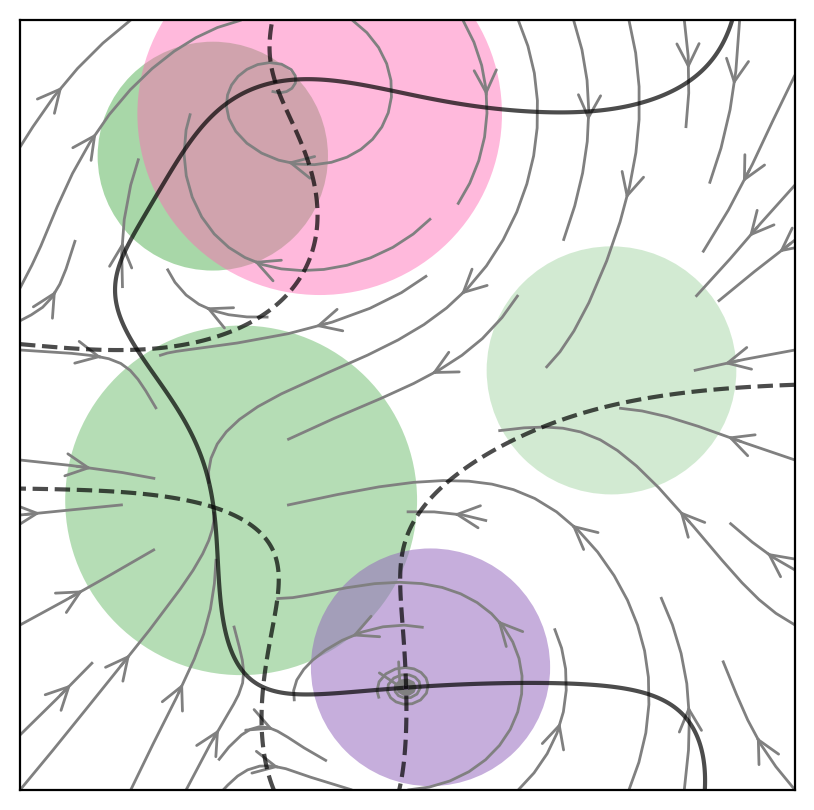

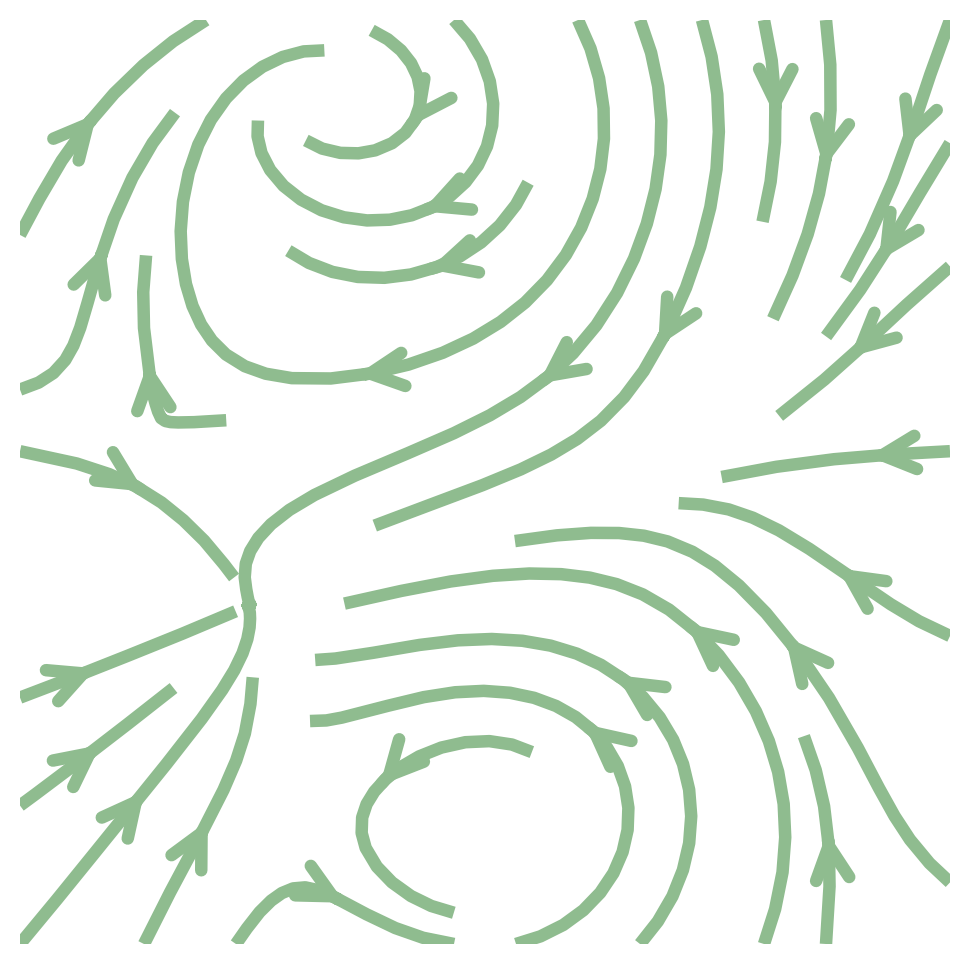

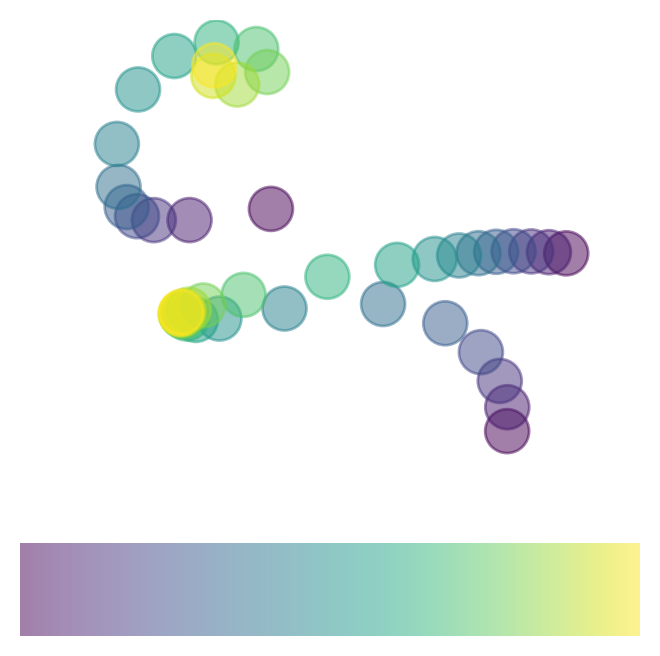

In [282]:

start_module_list = start_module_list_1 + start_module_list_2 + start_module_list_3
for m in start_module_list:
    m.tau = 0.2
landscape = Landscape(start_module_list, regime=mr.mr_sigmoid, morphogen_times=(10.,), A0=0.005)
print(landscape)
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')

derivs, pot, rot = landscape(0., (xx,yy), return_potentials=True)
fig, ax = plt.subplots(figsize=(6,6))
ax.streamplot(xx, yy, derivs[0], derivs[1], density=0.55, arrowsize=3., arrowstyle='->', linewidth=4.5,
                         color='darkseagreen', minlength=0.2)
ax.axis('off')

ncells = 3
nt = 15
init_cond = np.array(((-0.5, 0.5), (1.5, -2.), (2., 0.))).T
# init_cond = np.random.uniform(-2.,2., (2, ncells))
landscape.init_cells(ncells, init_cond)
traj, states = landscape.run_cells(0, 5, nt, 0.,)
fig, ax = plt.subplots(2, 1, figsize=(4,4), gridspec_kw={'height_ratios': [1, 0.2]})
for i in range(ncells):
    sc = ax[0].scatter(traj[0, i], traj[1, i], s=250, marker='o', c=np.arange(nt), alpha=0.5, cmap='viridis', edgecolors=None)
# ax[1].colorbar(sc)
fig.colorbar(sc, cax=ax[1], orientation='horizontal')
ax[0].set_xlim((-L*1.05, L*1.05))
ax[0].set_ylim((-L*1.05, L*1.05))
ax[0].axis('off')
ax[1].axis('off')


(-2.5, 2.5, -2.5, 2.5)

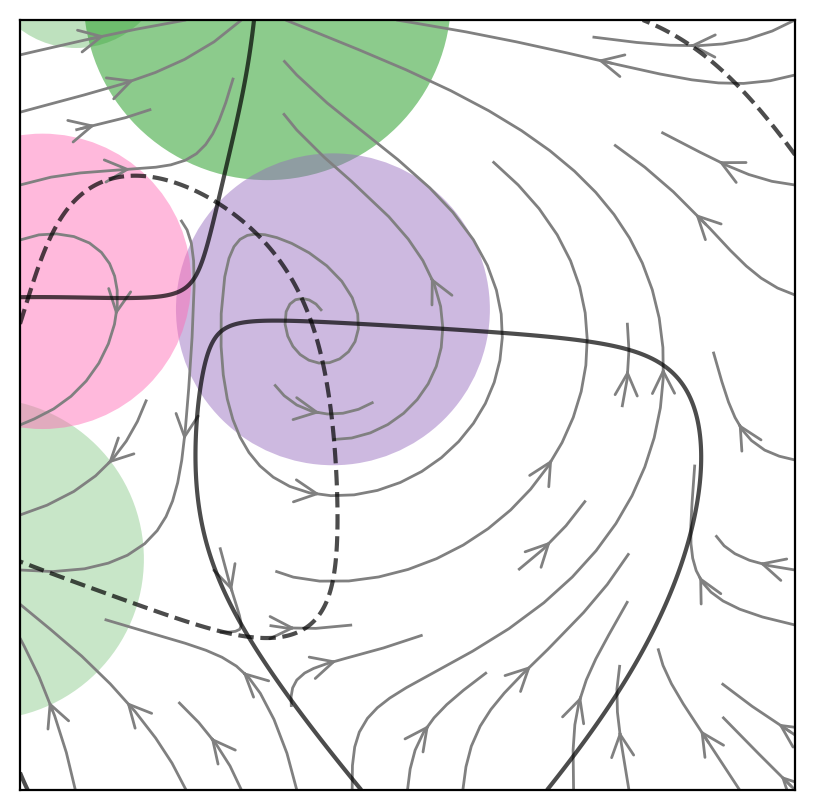

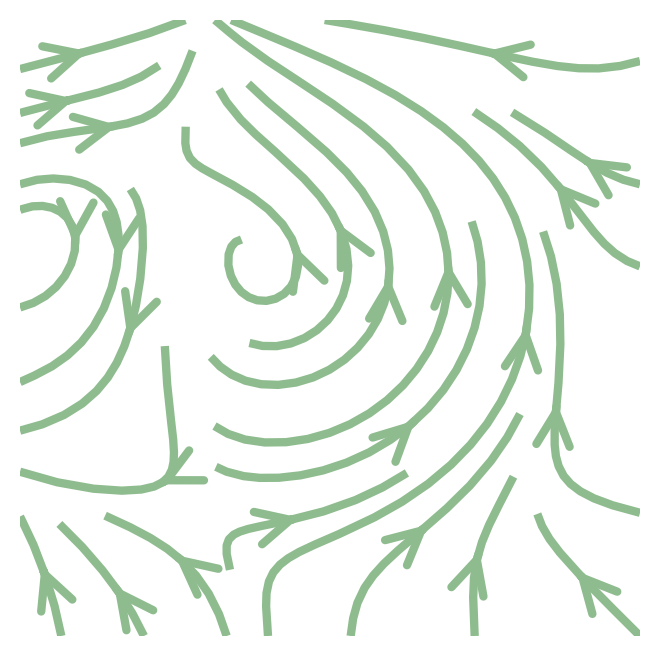

In [93]:
start_module_list = start_module_list_1 + start_module_list_2 + start_module_list_3
landscape = Landscape(start_module_list, regime=mr.mr_piecewise, morphogen_times=(2.,), A0=0.005)
fig = visualize_landscape(landscape, xx, yy, 0, color_scheme='fp_types')

derivs, pot, rot = landscape(0., (xx,yy), return_potentials=True)
fig, ax = plt.subplots(figsize=(4,4))
ax.streamplot(xx, yy, derivs[0], derivs[1], density=0.55, arrowsize=3., arrowstyle='->', linewidth=3,
                         color='darkseagreen', minlength=0.2)
ax.axis('off')

ax_cbar = fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])

    time_values = np.tile(np.arange(nt), (states.shape[0], 1))
    ax0.scatter(traj[0, :, :], traj[1, :, :], s=s, alpha=0.2, c=time_values, cmap=cmap_time, edgecolor=None)
    sc0 = ax0.scatter(2*L*np.ones(nt), 2*L*np.ones(nt), c=np.linspace(t0, tf, nt), cmap=cmap_time, alpha=0.7, s=0.01, edgecolors='none')
    tbar = fig.colorbar(sc0, cax=ax_cbar, orientation='horizontal', label='Time')
    if t_ticks is not None:
        tbar.set_ticks(np.linspace(*t_ticks))